# Overview
This jupyter notebook contains the code used to compute the recommendations made in the google doc called KevinLuo_Plan_for_Webb. The structure of the notebook is like this:
1. [Load Data](#Load-Data)
2. [Logan's Two Strike Frequency](#Logan's-Two-Strike-Frequency)
2. [Pitch Performance by Zone Height](#Pitch-Performance-by-Zone-Height)
3. [Release Point Analysis](#Release-Point-Analysis)

Additionally, I factored out much of the code functionality into individual functions placed in loganwebb_utils.py. Any function not defined in this notebook is defined in loganwebb_utils.py.

To run this notebook, you need to have the pybaseball library installed. To do this, simply run the following command: `pip install pybaseball`. Documentation for this library is [here](https://github.com/jldbc/pybaseball).

In [1]:
import matplotlib.pyplot as plt
from pybaseball import statcast, statcast_pitcher

from loganwebb_utils import *

## Load Data
I use the pybaseball library to scrape statcast/baseball savant. I begin by separately loading Logan Webb's info and then the info of all pitchers in 2020.

In [2]:
webb_stats = statcast_pitcher('2020-05-01', '2020-11-01', 657277)
webb_stats_2019 =  statcast_pitcher('2019-08-16', '2019-09-26', 657277)

Gathering Player Data
Gathering Player Data


In [3]:
# might take 3 minutes or so
all_stats = statcast(start_dt='2020-07-22', end_dt='2020-11-01')

This is a large query, it may take a moment to complete
Completed sub-query from 2020-07-22 to 2020-07-27
Completed sub-query from 2020-07-28 to 2020-08-02
Completed sub-query from 2020-08-03 to 2020-08-08
Completed sub-query from 2020-08-09 to 2020-08-14
Completed sub-query from 2020-08-15 to 2020-08-20
Completed sub-query from 2020-08-21 to 2020-08-26
Completed sub-query from 2020-08-27 to 2020-09-01
Completed sub-query from 2020-09-02 to 2020-09-07
Completed sub-query from 2020-09-08 to 2020-09-13
Completed sub-query from 2020-09-14 to 2020-09-19
Completed sub-query from 2020-09-20 to 2020-09-25
Completed sub-query from 2020-09-26 to 2020-10-01
Completed sub-query from 2020-10-02 to 2020-10-07
Completed sub-query from 2020-10-08 to 2020-10-13
Completed sub-query from 2020-10-14 to 2020-10-19
Completed sub-query from 2020-10-20 to 2020-10-25
Completed sub-query from 2020-10-26 to 2020-10-31
Completed sub-query from 2020-11-01 to 2020-11-01


In [4]:
# Take a look at the features available
webb_stats.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [5]:
webb_stats['xwoba_value'] = webb_stats.apply(parse_xwoba, axis=1)
all_stats['xwoba_value'] = all_stats.apply(parse_xwoba, axis=1)

## Logan's Two Strike Frequency
Logan didn't use his slider in two-strike counts as much as he did in 2019. But the slider could be the better strikeout pitch.

In [6]:
calls_by_pitch = webb_stats.groupby('pitch_type')
webb_stats_2str = webb_stats[webb_stats['strikes']==2]
print('Pitch frequency during two strikes (2020):')
calls_by_pitch.apply(parse_prop, df=webb_stats_2str)

Pitch frequency during two strikes (2020):


pitch_type
CH    0.350340
FC    0.010204
FF    0.343537
SI    0.095238
SL    0.200680
dtype: float64

In [7]:
calls_by_pitch_2019 = webb_stats_2019.groupby('pitch_type')
webb_stats_2str_2019 = webb_stats_2019[webb_stats_2019['strikes']==2]
print('Pitch frequency during two strikes (2019):')
calls_by_pitch_2019.apply(parse_prop, df=webb_stats_2str_2019)

Pitch frequency during two strikes (2019):


pitch_type
CH    0.236486
FF    0.344595
FT    0.081081
SL    0.337838
dtype: float64

## Pitch Performance by Zone Height
Below, I take a brief look at how each of Logan's pitches does by location. Blue dots are the pitches which qualify, purple dots are the swings, orange dots are whiffs.


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.15789473684210525
FF whiff rate: 0.125
FF whiffs: 1
FF called strikes: 2
FF swings: 8
FF strikes: 10
FF chances: 19


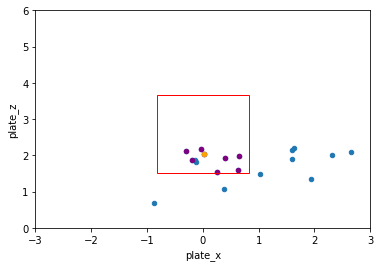


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.06896551724137931
FF whiff rate: 0.09090909090909091
FF whiffs: 2
FF called strikes: 0
FF swings: 22
FF strikes: 16
FF chances: 29


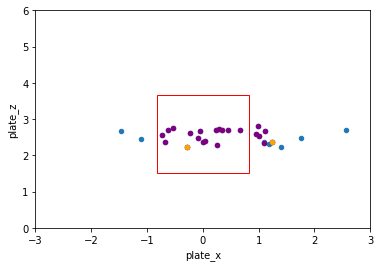


INFO FOR FF at (2.8, 100)
FF clean rate: 0.1509433962264151
FF whiff rate: 0.23333333333333334
FF whiffs: 7
FF called strikes: 1
FF swings: 30
FF strikes: 29
FF chances: 53


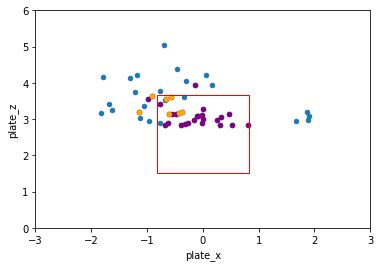

frequencies for FF by height: {(-100, 2.2): 0.18811881188118812, (2.2, 2.8): 0.2871287128712871, (2.8, 100): 0.5247524752475248}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.16901408450704225
CH whiff rate: 0.23076923076923078
CH whiffs: 9
CH called strikes: 3
CH swings: 39
CH strikes: 23
CH chances: 71


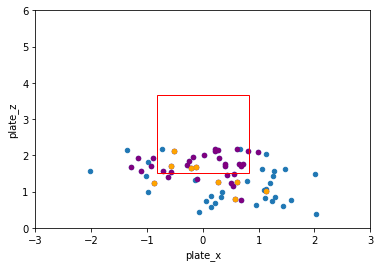


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.12
CH whiff rate: 0.05263157894736842
CH whiffs: 1
CH called strikes: 2
CH swings: 19
CH strikes: 16
CH chances: 25


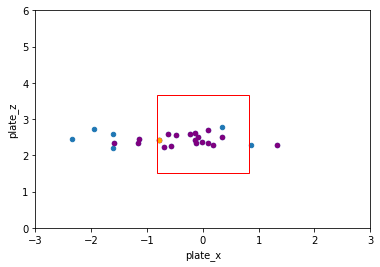


INFO FOR CH at (2.8, 100)
CH clean rate: 0.14285714285714285
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 1
CH swings: 1
CH strikes: 3
CH chances: 7


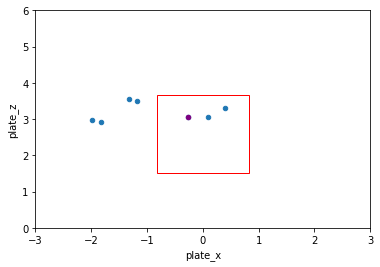

frequencies for CH by height: {(-100, 2.2): 0.6893203883495146, (2.2, 2.8): 0.24271844660194175, (2.8, 100): 0.06796116504854369}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.13725490196078433
SL whiff rate: 0.1875
SL whiffs: 3
SL called strikes: 4
SL swings: 16
SL strikes: 10
SL chances: 51


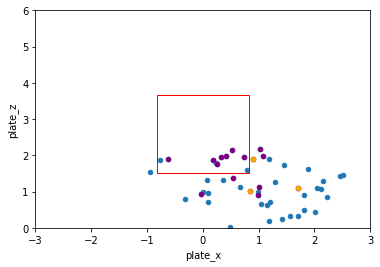


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.5
SL whiff rate: 0.3333333333333333
SL whiffs: 1
SL called strikes: 2
SL swings: 3
SL strikes: 5
SL chances: 6


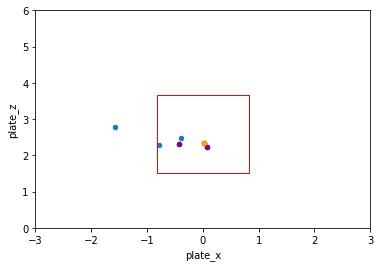


INFO FOR SL at (2.8, 100)
SL clean rate: 0.0
SL whiff rate: 0.0
SL whiffs: 0
SL called strikes: 0
SL swings: 1
SL strikes: 1
SL chances: 2


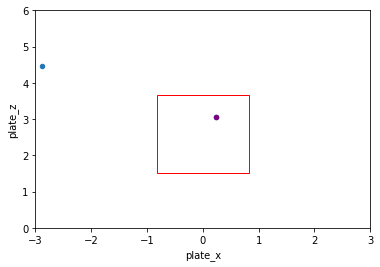

frequencies for SL by height: {(-100, 2.2): 0.864406779661017, (2.2, 2.8): 0.1016949152542373, (2.8, 100): 0.03389830508474576}

INFO FOR SI at (-100, 2.2)
SI clean rate: 0.0
SI whiff rate: 0.0
SI whiffs: 0
SI called strikes: 0
SI swings: 8
SI strikes: 5
SI chances: 10


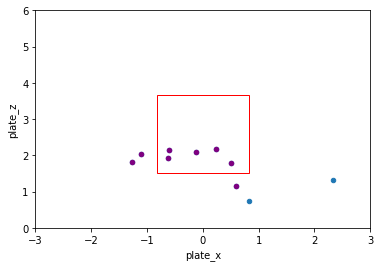


INFO FOR SI at (2.2, 2.8)
SI clean rate: 0.09090909090909091
SI whiff rate: 0.1
SI whiffs: 1
SI called strikes: 0
SI swings: 10
SI strikes: 9
SI chances: 11


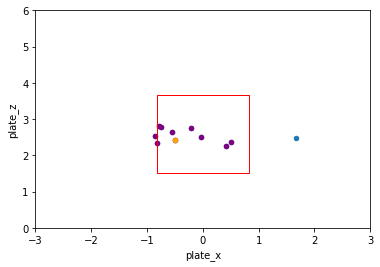


INFO FOR SI at (2.8, 100)
SI clean rate: 0.14285714285714285
SI whiff rate: 0.0
SI whiffs: 0
SI called strikes: 1
SI swings: 5
SI strikes: 5
SI chances: 7


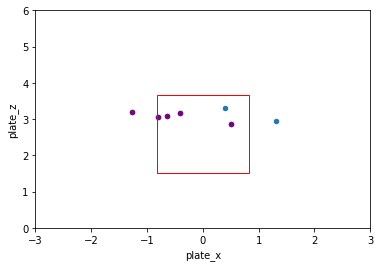

frequencies for SI by height: {(-100, 2.2): 0.35714285714285715, (2.2, 2.8): 0.39285714285714285, (2.8, 100): 0.25}


In [8]:
# look at 2-strike pitches exclusively from Logan 2020
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'SI'], webb_stats[webb_stats['strikes']==2], heights)


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.32967032967032966
FF whiff rate: 0.041666666666666664
FF whiffs: 1
FF called strikes: 29
FF swings: 24
FF strikes: 48
FF chances: 91


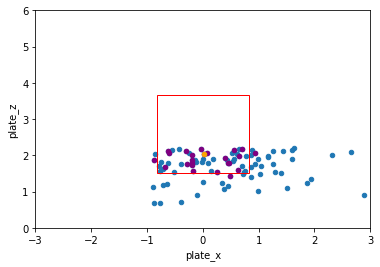


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.31868131868131866
FF whiff rate: 0.13725490196078433
FF whiffs: 7
FF called strikes: 22
FF swings: 51
FF strikes: 61
FF chances: 91


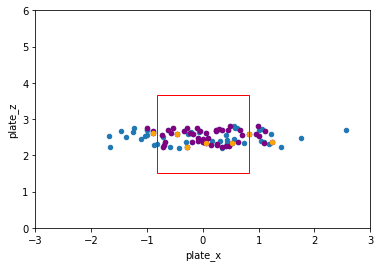


INFO FOR FF at (2.8, 100)
FF clean rate: 0.2532467532467532
FF whiff rate: 0.28125
FF whiffs: 18
FF called strikes: 21
FF swings: 64
FF strikes: 84
FF chances: 154


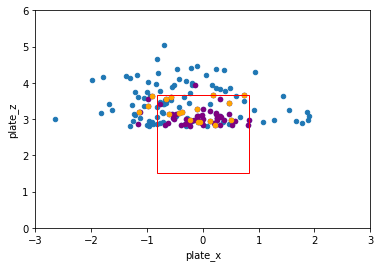

frequencies for FF by height: {(-100, 2.2): 0.2708333333333333, (2.2, 2.8): 0.2708333333333333, (2.8, 100): 0.4583333333333333}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.27586206896551724
CH whiff rate: 0.3302752293577982
CH whiffs: 36
CH called strikes: 20
CH swings: 109
CH strikes: 77
CH chances: 203


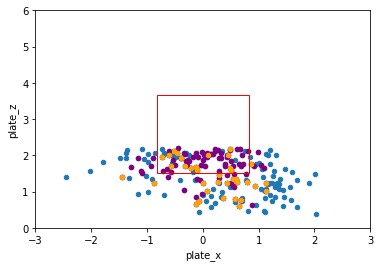


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.3333333333333333
CH whiff rate: 0.11428571428571428
CH whiffs: 4
CH called strikes: 18
CH swings: 35
CH strikes: 46
CH chances: 66


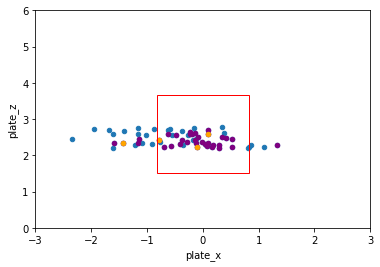


INFO FOR CH at (2.8, 100)
CH clean rate: 0.23684210526315788
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 9
CH swings: 4
CH strikes: 16
CH chances: 38


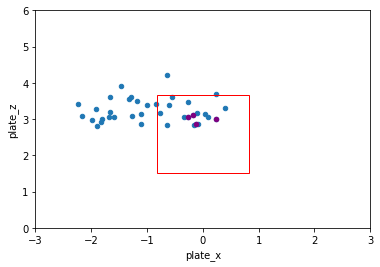

frequencies for CH by height: {(-100, 2.2): 0.6612377850162866, (2.2, 2.8): 0.21498371335504887, (2.8, 100): 0.1237785016286645}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.22115384615384615
SL whiff rate: 0.26666666666666666
SL whiffs: 8
SL called strikes: 15
SL swings: 30
SL strikes: 27
SL chances: 104


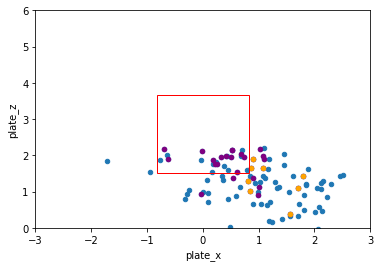


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.5714285714285714
SL whiff rate: 0.35714285714285715
SL whiffs: 5
SL called strikes: 15
SL swings: 14
SL strikes: 27
SL chances: 35


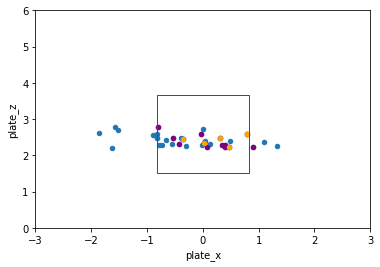


INFO FOR SL at (2.8, 100)
SL clean rate: 0.21428571428571427
SL whiff rate: 0.0
SL whiffs: 0
SL called strikes: 3
SL swings: 2
SL strikes: 7
SL chances: 14


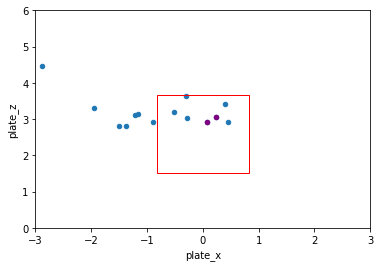

frequencies for SL by height: {(-100, 2.2): 0.6797385620915033, (2.2, 2.8): 0.22875816993464052, (2.8, 100): 0.0915032679738562}

INFO FOR SI at (-100, 2.2)
SI clean rate: 0.19696969696969696
SI whiff rate: 0.10714285714285714
SI whiffs: 3
SI called strikes: 10
SI swings: 28
SI strikes: 29
SI chances: 66


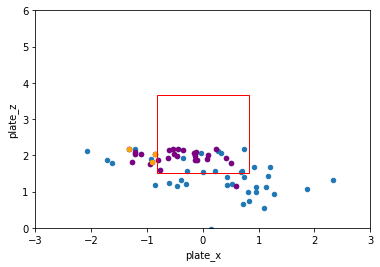


INFO FOR SI at (2.2, 2.8)
SI clean rate: 0.40425531914893614
SI whiff rate: 0.08333333333333333
SI whiffs: 2
SI called strikes: 17
SI swings: 24
SI strikes: 33
SI chances: 47


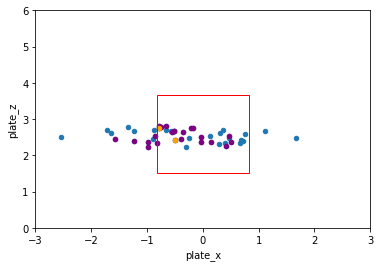


INFO FOR SI at (2.8, 100)
SI clean rate: 0.1388888888888889
SI whiff rate: 0.0
SI whiffs: 0
SI called strikes: 5
SI swings: 12
SI strikes: 18
SI chances: 36


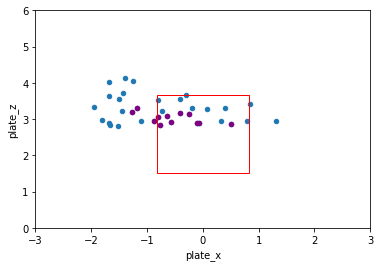

frequencies for SI by height: {(-100, 2.2): 0.4429530201342282, (2.2, 2.8): 0.31543624161073824, (2.8, 100): 0.24161073825503357}


In [9]:
# look at all pitches from Logan 2020
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'SI'], webb_stats, heights)

Below is for all pitchers: 


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.31606875072095975
FF whiff rate: 0.1168975754576942
FF whiffs: 945
FF called strikes: 7275
FF swings: 8084
FF strikes: 13035
FF chances: 26007


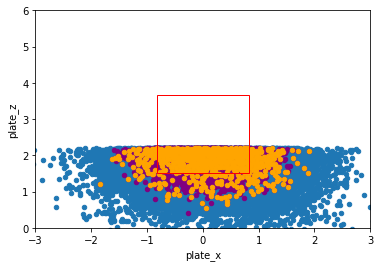


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.31303083633024714
FF whiff rate: 0.14145559474190444
FF whiffs: 2206
FF called strikes: 5976
FF swings: 15595
FF strikes: 18979
FF chances: 26138


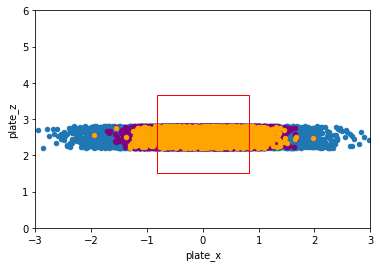


INFO FOR FF at (2.8, 100)
FF clean rate: 0.2283386189495127
FF whiff rate: 0.27822541500825165
FF whiffs: 5732
FF called strikes: 4132
FF swings: 20602
FF strikes: 22438
FF chances: 43199


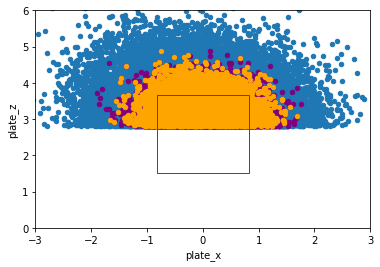

frequencies for FF by height: {(-100, 2.2): 0.2727701795603289, (2.2, 2.8): 0.2741441517033059, (2.8, 100): 0.4530856687363652}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.26603841971728887
CH whiff rate: 0.3629768941429339
CH whiffs: 4053
CH called strikes: 1819
CH swings: 11166
CH strikes: 7072
CH chances: 22072


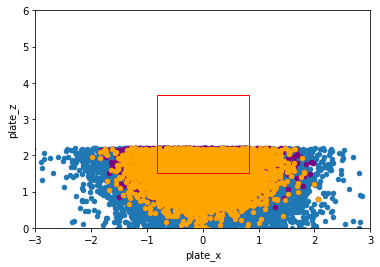


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.26166720308979724
CH whiff rate: 0.17330626744481095
CH whiffs: 683
CH called strikes: 943
CH swings: 3941
CH strikes: 3771
CH chances: 6214


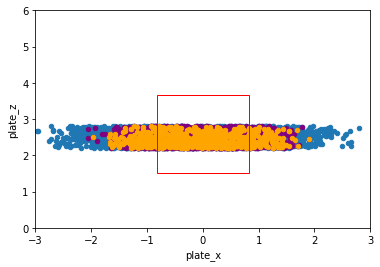


INFO FOR CH at (2.8, 100)
CH clean rate: 0.20951068228807718
CH whiff rate: 0.18613138686131386
CH whiffs: 255
CH called strikes: 657
CH swings: 1370
CH strikes: 1750
CH chances: 4353


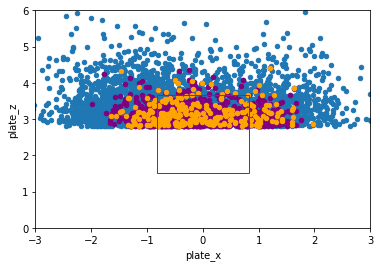

frequencies for CH by height: {(-100, 2.2): 0.6762462085235454, (2.2, 2.8): 0.19038573485707283, (2.8, 100): 0.13336805661938173}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.298774712011489
SL whiff rate: 0.43627385559855864
SL whiffs: 6538
SL called strikes: 3240
SL swings: 14986
SL strikes: 9721
SL chances: 32727


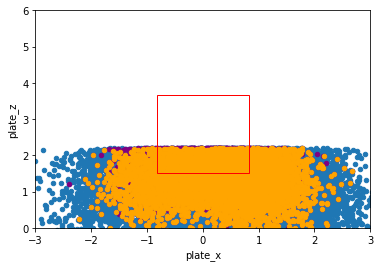


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.3422525180588056
SL whiff rate: 0.1573544261191518
SL whiffs: 935
SL called strikes: 2429
SL swings: 5942
SL strikes: 7157
SL chances: 9829


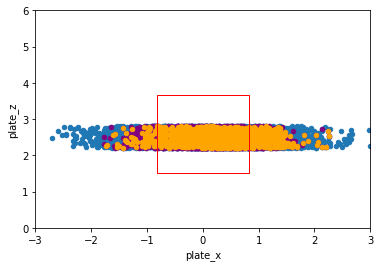


INFO FOR SL at (2.8, 100)
SL clean rate: 0.33235867446393763
SL whiff rate: 0.25906526994359386
SL whiffs: 643
SL called strikes: 1744
SL swings: 2482
SL strikes: 4418
SL chances: 7182


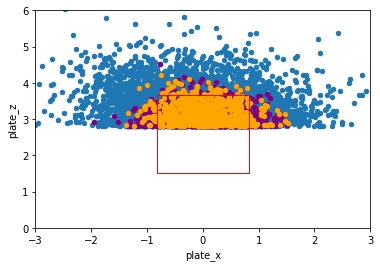

frequencies for SL by height: {(-100, 2.2): 0.657987856367365, (2.2, 2.8): 0.19761550524749688, (2.8, 100): 0.14439663838513814}

INFO FOR SI at (-100, 2.2)
SI clean rate: 0.2747600721001608
SI whiff rate: 0.1452839756592292
SI whiffs: 1146
SI called strikes: 4494
SI swings: 7888
SI strikes: 9267
SI chances: 20527


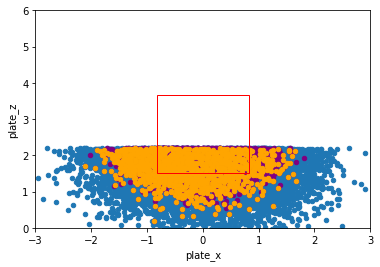


INFO FOR SI at (2.2, 2.8)
SI clean rate: 0.2816276579470705
SI whiff rate: 0.09414858645627876
SI whiffs: 716
SI called strikes: 2966
SI swings: 7605
SI strikes: 8651
SI chances: 13074


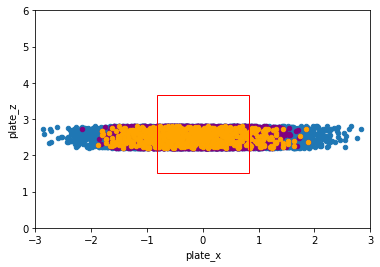


INFO FOR SI at (2.8, 100)
SI clean rate: 0.23349436392914655
SI whiff rate: 0.20233715645964076
SI whiffs: 935
SI called strikes: 1820
SI swings: 4621
SI strikes: 5978
SI chances: 11799


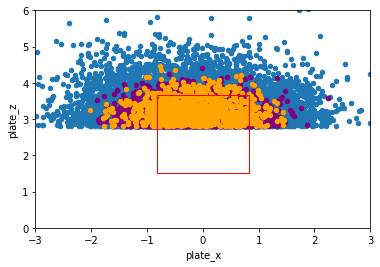

frequencies for SI by height: {(-100, 2.2): 0.45213656387665196, (2.2, 2.8): 0.2879735682819383, (2.8, 100): 0.2598898678414097}


In [10]:
# all pitches in 2020 from all pitchers
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'SI'], all_stats, heights)

Now, I look at Logan's 2019:

In [11]:
print("Number of 2020 pitches: " + str(len(webb_stats)))
print("Number of 2019 pitches: " + str(len(webb_stats_2019)))

Number of 2020 pitches: 998
Number of 2019 pitches: 586


In [12]:
set(webb_stats_2019['pitch_type'])

{'CH', 'FF', 'FT', 'SL'}


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.26436781609195403
FF whiff rate: 0.05555555555555555
FF whiffs: 1
FF called strikes: 22
FF swings: 18
FF strikes: 36
FF chances: 87


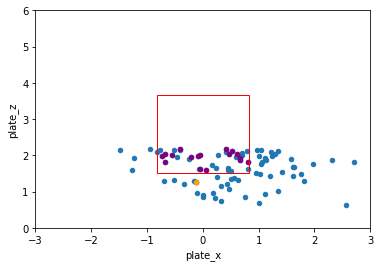


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.28205128205128205
FF whiff rate: 0.05555555555555555
FF whiffs: 2
FF called strikes: 20
FF swings: 36
FF strikes: 42
FF chances: 78


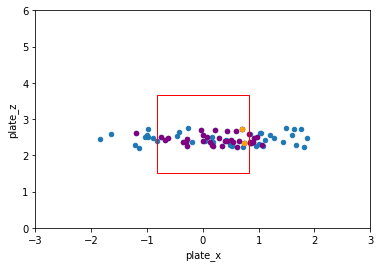


INFO FOR FF at (2.8, 100)
FF clean rate: 0.20689655172413793
FF whiff rate: 0.2
FF whiffs: 9
FF called strikes: 9
FF swings: 45
FF strikes: 48
FF chances: 87


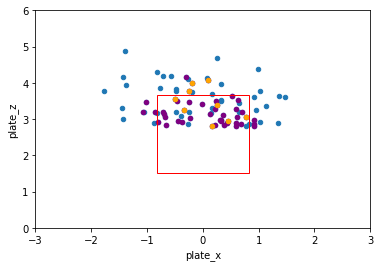

frequencies for FF by height: {(-100, 2.2): 0.34523809523809523, (2.2, 2.8): 0.30952380952380953, (2.8, 100): 0.34523809523809523}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.3
CH whiff rate: 0.43902439024390244
CH whiffs: 18
CH called strikes: 6
CH swings: 41
CH strikes: 30
CH chances: 80


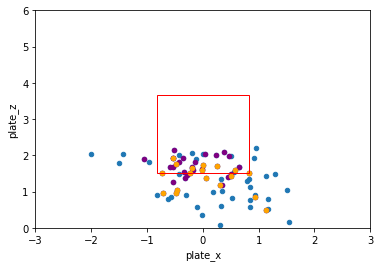


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.24
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 6
CH swings: 13
CH strikes: 12
CH chances: 25


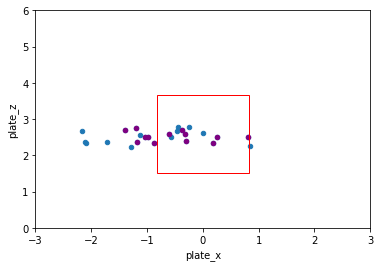


INFO FOR CH at (2.8, 100)
CH clean rate: 0.14285714285714285
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 2
CH swings: 5
CH strikes: 5
CH chances: 14


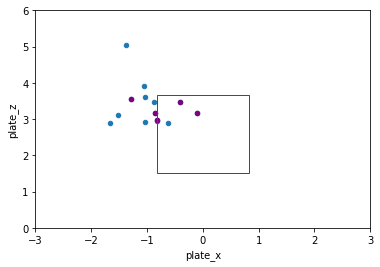

frequencies for CH by height: {(-100, 2.2): 0.6722689075630253, (2.2, 2.8): 0.21008403361344538, (2.8, 100): 0.11764705882352941}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.2987012987012987
SL whiff rate: 0.43243243243243246
SL whiffs: 16
SL called strikes: 7
SL swings: 37
SL strikes: 19
SL chances: 77


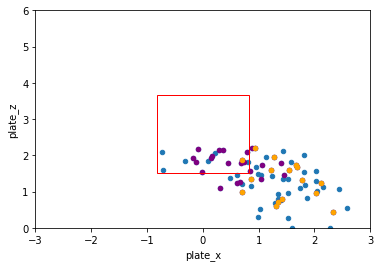


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.4722222222222222
SL whiff rate: 0.11764705882352941
SL whiffs: 2
SL called strikes: 15
SL swings: 17
SL strikes: 26
SL chances: 36


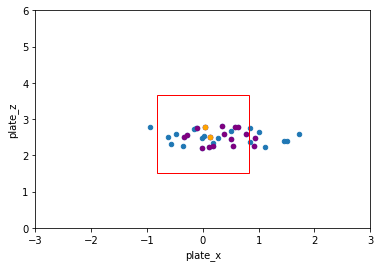


INFO FOR SL at (2.8, 100)
SL clean rate: 0.375
SL whiff rate: 0.2857142857142857
SL whiffs: 2
SL called strikes: 7
SL swings: 7
SL strikes: 17
SL chances: 24


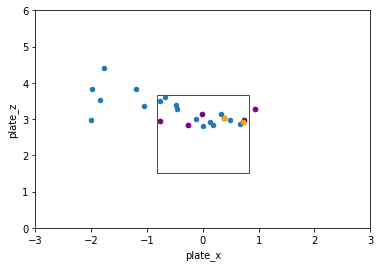

frequencies for SL by height: {(-100, 2.2): 0.5620437956204379, (2.2, 2.8): 0.26277372262773724, (2.8, 100): 0.17518248175182483}

INFO FOR FT at (-100, 2.2)
FT clean rate: 0.17391304347826086
FT whiff rate: 0.1875
FT whiffs: 3
FT called strikes: 5
FT swings: 16
FT strikes: 16
FT chances: 46


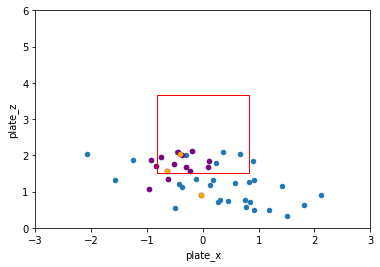


INFO FOR FT at (2.2, 2.8)
FT clean rate: 0.23529411764705882
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 4
FT swings: 10
FT strikes: 12
FT chances: 17


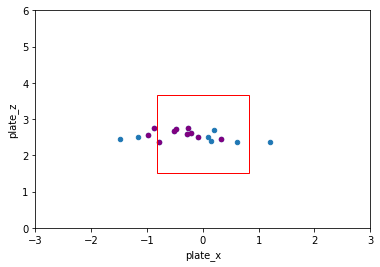


INFO FOR FT at (2.8, 100)
FT clean rate: 0.26666666666666666
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 4
FT swings: 7
FT strikes: 10
FT chances: 15


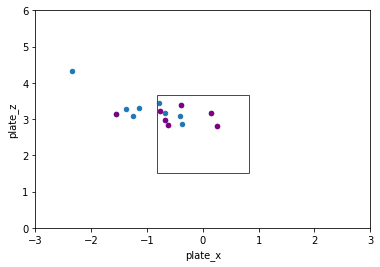

frequencies for FT by height: {(-100, 2.2): 0.5897435897435898, (2.2, 2.8): 0.21794871794871795, (2.8, 100): 0.19230769230769232}


In [13]:
# all pitches in 2019
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'FT'], webb_stats_2019, heights)


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.1111111111111111
FF whiff rate: 0.0
FF whiffs: 0
FF called strikes: 1
FF swings: 3
FF strikes: 3
FF chances: 9


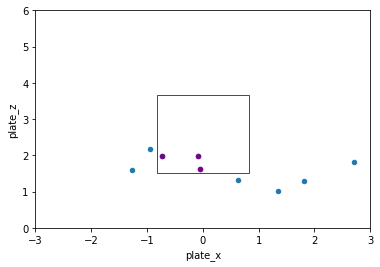


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.0625
FF whiff rate: 0.0
FF whiffs: 0
FF called strikes: 1
FF swings: 13
FF strikes: 8
FF chances: 16


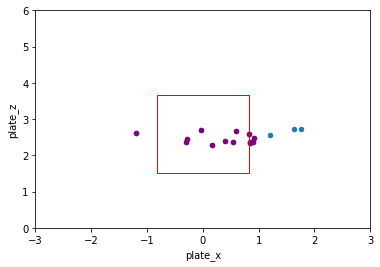


INFO FOR FF at (2.8, 100)
FF clean rate: 0.15384615384615385
FF whiff rate: 0.21052631578947367
FF whiffs: 4
FF called strikes: 0
FF swings: 19
FF strikes: 14
FF chances: 26


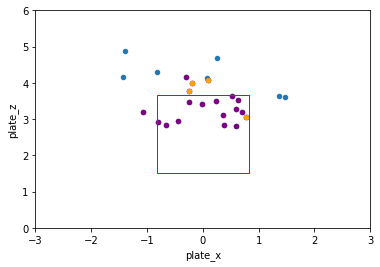

frequencies for FF by height: {(-100, 2.2): 0.17647058823529413, (2.2, 2.8): 0.3137254901960784, (2.8, 100): 0.5098039215686274}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.3076923076923077
CH whiff rate: 0.5333333333333333
CH whiffs: 8
CH called strikes: 0
CH swings: 15
CH strikes: 9
CH chances: 26


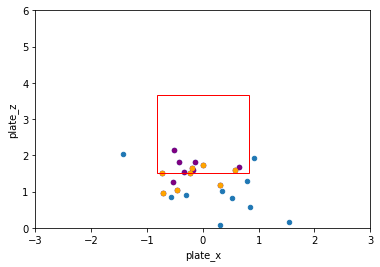


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.0
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 0
CH swings: 5
CH strikes: 3
CH chances: 7


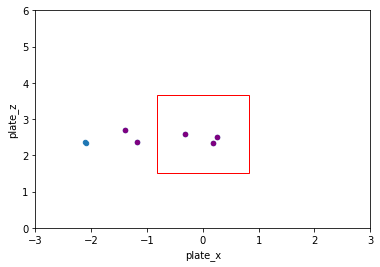


INFO FOR CH at (2.8, 100)
CH clean rate: 0.0
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 0
CH swings: 2
CH strikes: 1
CH chances: 2


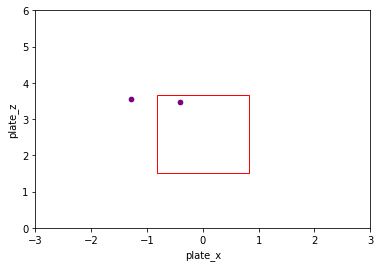

frequencies for CH by height: {(-100, 2.2): 0.7428571428571429, (2.2, 2.8): 0.2, (2.8, 100): 0.05714285714285714}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.25
SL whiff rate: 0.45454545454545453
SL whiffs: 10
SL called strikes: 0
SL swings: 22
SL strikes: 8
SL chances: 40


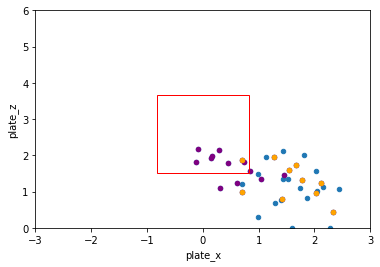


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.5
SL whiff rate: 0.0
SL whiffs: 0
SL called strikes: 3
SL swings: 3
SL strikes: 5
SL chances: 6


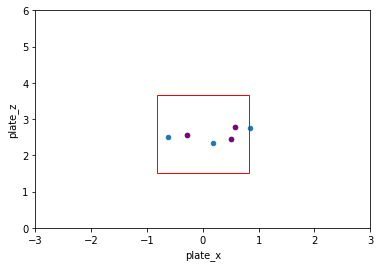


INFO FOR SL at (2.8, 100)
SL clean rate: 0.0
SL whiff rate: 0.0
SL whiffs: 0
SL called strikes: 0
SL swings: 4
SL strikes: 3
SL chances: 4


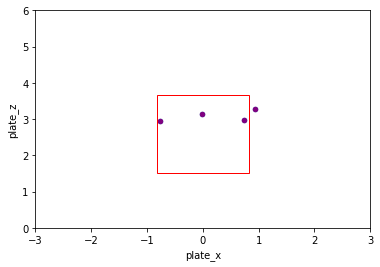

frequencies for SL by height: {(-100, 2.2): 0.8, (2.2, 2.8): 0.12, (2.8, 100): 0.08}

INFO FOR FT at (-100, 2.2)
FT clean rate: 0.16666666666666666
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 1
FT swings: 1
FT strikes: 1
FT chances: 6


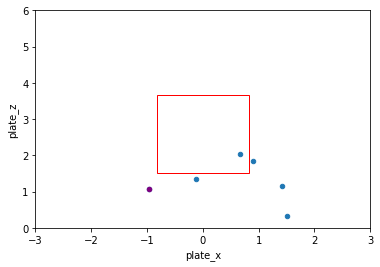


INFO FOR FT at (2.2, 2.8)
FT clean rate: 0.0
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 0
FT swings: 4
FT strikes: 3
FT chances: 4


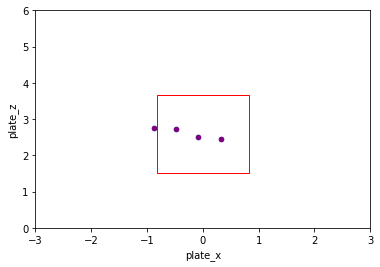


INFO FOR FT at (2.8, 100)
FT clean rate: 0.0
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 0
FT swings: 1
FT strikes: 1
FT chances: 2


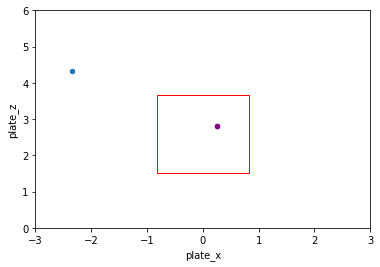

frequencies for FT by height: {(-100, 2.2): 0.5, (2.2, 2.8): 0.3333333333333333, (2.8, 100): 0.16666666666666666}


In [14]:
# exclusively 2 strikes in 2019
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'FT'], webb_stats_2019[webb_stats_2019['strikes']==2], heights)

## Release Point Analysis
Below, I investigate the curious case of Logan Webb's release point. I use this as a proxy for understanding the repeatibility of his mechanics and as a metric he can use to measure his progress.

Webb's pitches appear to tunnel well in terms of release point, i.e. the average release points aren't distinguishable. But the spread seems big.

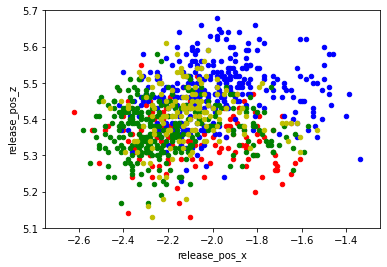

In [15]:
# plot
ax = webb_stats[webb_stats['pitch_type']=='SL'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats[webb_stats['pitch_type']=='FF'].plot(ax=ax, x='release_pos_x', y='release_pos_z', kind='scatter', color='b')
webb_stats[webb_stats['pitch_type']=='CH'].plot(ax=ax, x='release_pos_x', y='release_pos_z', kind='scatter', color='g')
webb_stats[webb_stats['pitch_type']=='SI'].plot(ax=ax, x='release_pos_x', y='release_pos_z', kind='scatter', color='y')
plt.xlim([-2.75, -1.25])
plt.ylim([5.1, 5.7])
plt.show()

Below, I visualize the release points of each of his pitches and specifically compare them from 2020 to 2019. Red is 2020, blue is 2019.

<AxesSubplot:xlabel='release_pos_x', ylabel='release_pos_z'>

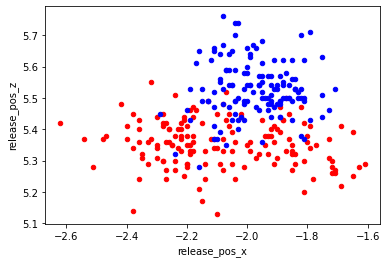

In [16]:
ax = webb_stats[webb_stats['pitch_type']=='SL'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats_2019[webb_stats_2019['pitch_type']=='SL'].plot(ax=ax, x='release_pos_x', y='release_pos_z', 
                                                          kind='scatter', color='b')

<AxesSubplot:xlabel='release_pos_x', ylabel='release_pos_z'>

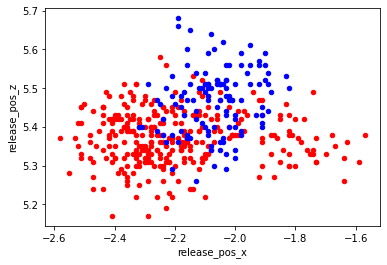

In [17]:
ax = webb_stats[webb_stats['pitch_type']=='CH'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats_2019[webb_stats_2019['pitch_type']=='CH'].plot(ax=ax, x='release_pos_x', y='release_pos_z', 
                                                          kind='scatter', color='b')

<AxesSubplot:xlabel='release_pos_x', ylabel='release_pos_z'>

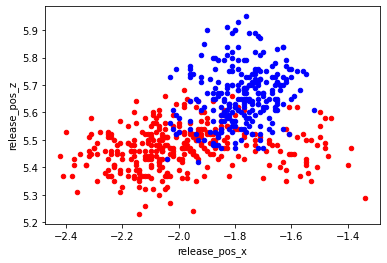

In [18]:
ax = webb_stats[webb_stats['pitch_type']=='FF'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats_2019[webb_stats_2019['pitch_type']=='FF'].plot(ax=ax, x='release_pos_x', y='release_pos_z', 
                                                          kind='scatter', color='b')

<AxesSubplot:xlabel='release_pos_x', ylabel='release_pos_z'>

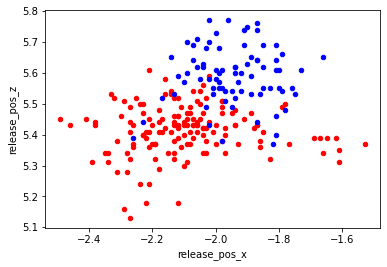

In [19]:
ax = webb_stats[webb_stats['pitch_type']=='SI'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats_2019[webb_stats_2019['pitch_type']=='FT'].plot(ax=ax, x='release_pos_x', y='release_pos_z', 
                                                          kind='scatter', color='b')

Below, I compute the "variance" of his release point by pitch and compare from 2020 to 2019. Clearly, Webb regressed significantly in terms of this consistency which is no-doubt related to his control issues.

In [6]:
webb_pitches = ['FF', 'CH', 'SL', 'SI']
res_webb_2020 = release_point_analysis(webb_stats, webb_pitches, '2020', webb=True)
res_webb_2019 = release_point_analysis(webb_stats_2019, webb_pitches, '2019', webb=True)
print("Logan Webb Release Point Variation, 2020 vs. 2019:\n")
for pt in res_webb_2020.index:
    print(pt + ': ' + str(res_webb_2020[pt]) + ' vs. ' + str(res_webb_2019[pt]))

    pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0           CH  2020-09-27           85.5          -2.36           5.25   
1           SI  2020-09-27           91.4          -2.02           5.44   
2           SI  2020-09-27           92.9          -2.19           5.37   
3           SI  2020-09-27           92.6          -2.03           5.38   
4           CH  2020-09-27           85.8          -2.11           5.32   
..         ...         ...            ...            ...            ...   
993         FF  2020-07-25           96.0          -1.47           5.44   
994         FF  2020-07-25           96.2          -1.48           5.47   
995         CH  2020-07-25           87.6          -1.77           5.42   
996         CH  2020-07-25           87.5          -1.74           5.49   
997         FF  2020-07-25           95.2          -1.55           5.50   

    player_name  batter  pitcher     events          description  ...  \
0    Logan Webb  502054   

In [7]:
def release_point_analysis(df, pitches, year, webb=False):
    """ Given a dataframe representing a pitcher, return the release point variance for each pitch in pitches. """
    res = {}
    print(df)
    print('\n\n\n')
    for pitch in pitches:
        res[pitch] = float('NaN')
        if webb and year == '2019' and pitch == 'SI':
            pitch = 'FT'
        if len(df[df['pitch_type']==pitch]) > 20:
            avg_x = df[df['pitch_type']==pitch]['release_pos_x'].sum()/len(
            df[df['pitch_type']==pitch])
            avg_z = df[df['pitch_type']==pitch]['release_pos_z'].sum()/len(
                df[df['pitch_type']==pitch])
            avg = np.array((avg_x, avg_z))
            rel = df[df['pitch_type']==pitch][['release_pos_x', 'release_pos_z']].values
            rel_dist = []
            for i in range(0, rel.shape[0]):
                rel_dist.append(np.linalg.norm(avg-rel[i]))
            stat = np.mean(rel_dist)
            if webb and year == '2019' and pitch == 'FT':
                pitch = 'SI'
            res[pitch]=stat
    return pd.Series(res)

In [10]:
res_all_2020 = all_stats.groupby('pitcher').apply(release_point_analysis, pitches=webb_pitches, year='2020')
print("League Average Release Point Variation in 2020: ")
res_all_2020.mean()

        index pitch_type  game_date  release_speed  release_pos_x  \
15784    3809         SL 2020-09-29           75.4           2.67   
15785    3812         SL 2020-09-29           76.1           2.20   
15786    3813         SI 2020-09-29           88.9           2.51   
15787    3816         SI 2020-09-29           88.7           2.51   
15788    3817         SL 2020-09-29           75.4           2.48   
...       ...        ...        ...            ...            ...   
267275   4378         SI 2020-07-26           87.3           2.82   
267276   4394         SL 2020-07-26           76.0           1.98   
267277   4414         FF 2020-07-26           86.4           1.82   
267278   4417         SL 2020-07-26           73.6           2.09   
267279   4440         SL 2020-07-26           75.2           2.59   

        release_pos_z   player_name    batter   pitcher     events  ...  \
15784            5.26  Oliver Perez  543309.0  424144.0  field_out  ...   
15785            5.53

[390 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
8498      131         CH 2020-10-07           87.4          -1.43   
8499      135         CH 2020-10-07           87.2          -1.32   
8500      140         FF 2020-10-07           93.9          -1.19   
8501      142         SI 2020-10-07           92.0          -1.15   
8502      147         SI 2020-10-07           88.2          -1.33   
...       ...        ...        ...            ...            ...   
277769  11980         CH 2020-07-24           83.6          -1.37   
277770  11985         SI 2020-07-24           88.1          -1.03   
277771  11992         SI 2020-07-24           88.9          -1.22   
277772  12001         CH 2020-07-24           84.3          -1.42   
277773  12007         SI 2020-07-24           90.0          -1.26   

        release_pos_z       player_name    batter   pitcher     events  ...  \
8498             5.99  Brandon Kintzler  518692.0  445213.0  fie

[108 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
1027      768         CU 2020-10-23           79.2          -2.01   
1028      769         FF 2020-10-23           93.9          -2.03   
1029      770         CU 2020-10-23           79.7          -2.17   
1030      771         SI 2020-10-23           92.9          -2.12   
1031      772         FS 2020-10-23           86.4          -2.15   
...       ...        ...        ...            ...            ...   
278947  15707         FF 2020-07-24           93.3          -1.78   
278948  15719         CU 2020-07-24           77.4          -1.91   
278949  15731         CU 2020-07-24           76.9          -1.78   
278950  15744         SI 2020-07-24           92.6          -1.64   
278951  15761         FF 2020-07-24           92.7          -1.71   

        release_pos_z     player_name    batter   pitcher events  ...  \
1027             5.37  Charlie Morton  571970.0  450203.0   walk  ... 

[367 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
44960   17464         FF 2020-09-21           90.9          -0.28   
44961   17474         CU 2020-09-21           77.1          -0.46   
44962   17478         FS 2020-09-21           78.7          -0.36   
44963   17487         CU 2020-09-21           76.4          -0.42   
44964   17494         FF 2020-09-21           89.7          -0.28   
...       ...        ...        ...            ...            ...   
207046   7253         FS 2020-08-12           81.1          -0.17   
207047   7270         FS 2020-08-12           80.7          -0.36   
207048   7284         FF 2020-08-12           90.3          -0.07   
207049   7298         FF 2020-08-12           90.5          -0.16   
207050   7311         CU 2020-08-12           75.3          -0.40   

        release_pos_z   player_name    batter   pitcher  events  ...  \
44960            6.28  Blake Parker  571788.0  453284.0  single  ...   

[286 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
9172     1671         SI 2020-10-06           89.1           1.90   
9173     1676         SI 2020-10-06           88.2           2.01   
9174     1682         SI 2020-10-06           87.6           1.84   
9175     1685         CH 2020-10-06           87.0           1.99   
9176     1687         CH 2020-10-06           87.8           1.98   
...       ...        ...        ...            ...            ...   
254538  13146         FF 2020-07-30           91.5           1.87   
254539  13157         FF 2020-07-30           91.5           1.66   
254540  13158         FF 2020-07-30           90.6           1.78   
254541  13174         SL 2020-07-30           88.0           1.96   
254542  13180         FF 2020-07-30           89.5           1.66   

        release_pos_z player_name    batter   pitcher    events  ...  \
9172             6.16   J.A. Happ  596847.0  457918.0      walk  ...   

[618 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
6731     2202         FF 2020-10-08           93.5          -1.24   
6732     2205         FF 2020-10-08           93.4          -1.89   
6733     2211         SL 2020-10-08           78.3          -1.19   
6734     2213         FF 2020-10-08           93.2          -1.43   
6735     2220         FF 2020-10-08           93.4          -1.15   
...       ...        ...        ...            ...            ...   
277566  12966         CU 2020-07-24           71.2          -1.74   
277567  12975         FF 2020-07-24           92.7          -2.68   
277568  12989         SL 2020-07-24           74.9          -2.65   
277569  13008         FF 2020-07-24           91.1          -1.93   
277570  13010         FF 2020-07-24           91.6          -1.97   

        release_pos_z   player_name    batter   pitcher       events  ...  \
6731             5.84  Joakim Soria  493329.0  465657.0    field_o

        index pitch_type  game_date  release_speed  release_pos_x  \
178656   4264         SL 2020-08-19           80.1          -2.25   
178657   4277         FC 2020-08-19           87.3          -1.97   
178658   4296         FC 2020-08-19           86.3          -2.08   
178659   4297         FC 2020-08-19           88.1          -1.96   
178660   4311         SL 2020-08-19           82.1          -2.01   
...       ...        ...        ...            ...            ...   
274466   9732         SI 2020-07-25           90.5          -1.74   
274467   9745         SL 2020-07-25           79.5          -1.99   
274468   9767         SI 2020-07-25           90.1          -1.84   
274469   9785         SL 2020-07-25           79.8          -1.97   
274470   9786         SL 2020-07-25           78.1          -2.02   

        release_pos_z player_name    batter   pitcher     events  ...  \
178656           6.03    Chaz Roe  458731.0  475054.0  field_out  ...   
178657           6.23    

[191 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
9145     1565         SL 2020-10-06           80.2          -2.70   
9146     1567         SL 2020-10-06           81.0          -2.76   
9147     1571         SL 2020-10-06           78.6          -2.86   
9148     1575         SI 2020-10-06           92.5          -2.67   
9149     1581         SL 2020-10-06           80.2          -2.96   
...       ...        ...        ...            ...            ...   
270727   5418         SI 2020-07-26           93.2          -2.23   
270728   5441         SL 2020-07-26           80.0          -2.65   
270729   5450         SI 2020-07-26           91.9          -2.28   
270730   5473         SI 2020-07-26           92.5          -2.15   
270731   5490         SL 2020-07-26           78.5          -2.61   

        release_pos_z    player_name    batter   pitcher     events  ...  \
9145             5.09  Adam Ottavino  642715.0  493603.0  field_out

        index pitch_type  game_date  release_speed  release_pos_x  \
23881   11735         FF 2020-09-26           92.8          -1.72   
23882   11755         CU 2020-09-26           79.8          -2.02   
23883   11757         FF 2020-09-26           92.5          -1.74   
23884   11781         CH 2020-09-26           84.2          -2.04   
23885   11794         SI 2020-09-26           92.0          -1.87   
...       ...        ...        ...            ...            ...   
263176  21785         CH 2020-07-28           84.6          -2.15   
263177  21802         FF 2020-07-28           93.7          -1.86   
263178  21821         FF 2020-07-28           92.2          -1.84   
263179  21834         FF 2020-07-28           92.8          -1.87   
263180  21840         SI 2020-07-28           91.6          -1.94   

        release_pos_z  player_name    batter   pitcher     events  ...  \
23881            6.48  Kyle Gibson  502210.0  502043.0  field_out  ...   
23882            6.46  

[652 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
50127   21818         CH 2020-09-20           84.8           2.04   
50128   21828         SI 2020-09-20           93.1           1.89   
50129   21850         SI 2020-09-20           92.9           1.90   
50130   21851         KC 2020-09-20           80.7           2.23   
50131   21873         CH 2020-09-20           83.7           1.94   
...       ...        ...        ...            ...            ...   
262338  21789         FF 2020-07-28           92.4           2.25   
262339  21810         KC 2020-07-28           81.4           2.37   
262340  21811         KC 2020-07-28           83.0           2.56   
262341  21829         SI 2020-07-28           93.2           2.34   
262342  21851         SI 2020-07-28           92.6           2.37   

        release_pos_z    player_name    batter   pitcher     events  ...  \
50127            5.91  Derek Holland  657557.0  502706.0  field_out

[202 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
29504     661         FF 2020-09-25           96.5          -1.77   
29505     683         FF 2020-09-25           96.3          -1.32   
29506     698         FF 2020-09-25           95.7          -1.64   
29507     710         SL 2020-09-25           86.5          -1.19   
29508     715         FF 2020-09-25           96.1          -1.66   
...       ...        ...        ...            ...            ...   
259549  18805         SI 2020-07-28           94.9          -1.37   
259550  18819         SL 2020-07-28           83.4          -0.84   
259551  18823         FF 2020-07-28           94.8          -1.38   
259552  18838         SL 2020-07-28           83.4          -0.70   
259553  18852         FF 2020-07-28           95.5          -1.03   

        release_pos_z   player_name    batter   pitcher     events  ...  \
29504            5.68  Ryan Brasier  621020.0  518489.0  field_out  

[247 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
43208   17565         FF 2020-09-21           92.9          -0.15   
43209   17579         SL 2020-09-21           86.7          -0.31   
43210   17591         CU 2020-09-21           79.7          -0.31   
43211   17594         SL 2020-09-21           86.2          -0.48   
43212   17607         FF 2020-09-21           93.7          -0.32   
...       ...        ...        ...            ...            ...   
276147  13209         CH 2020-07-24           84.4          -0.60   
276148  13228         SL 2020-07-24           84.9          -0.17   
276149  13245         CU 2020-07-24           78.4          -0.17   
276150  13248         FF 2020-07-24           92.1          -0.14   
276151  13272         SL 2020-07-24           84.7          -0.35   

        release_pos_z   player_name    batter   pitcher     events  ...  \
43208            6.01  Greg Holland  451594.0  518813.0  strikeout  

        index pitch_type  game_date  release_speed  release_pos_x  \
183086  11016         FF 2020-08-18           84.5          -2.71   
183087  11033         SL 2020-08-18           73.2           3.64   
183104  11278         FC 2020-08-18           83.8           3.10   
183105  11279         SL 2020-08-18           73.5           3.68   
183106  11298         FF 2020-08-18           86.8          -2.85   
183107  11309         SI 2020-08-18           87.9          -3.06   
183108  11327         SI 2020-08-18           86.3          -2.96   
183109  11347         CU 2020-08-18           72.5          -3.73   
183110  11350         SI 2020-08-18           88.4          -2.84   
183111  11367         SL 2020-08-18           77.2          -3.14   
183112  11376         CU 2020-08-18           66.7           3.76   
183113  11393         FC 2020-08-18           75.2           3.56   
183114  11412         FC 2020-08-18           80.6           3.67   
183115  11430         SL 2020-08-1

[481 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
16682    5615         SI 2020-09-27           95.8          -1.52   
16683    5625         CU 2020-09-27           79.6          -1.46   
16684    5642         SI 2020-09-27           94.8          -1.66   
16685    5656         SI 2020-09-27           94.2          -1.61   
16686    5672         SL 2020-09-27           82.2          -1.47   
...       ...        ...        ...            ...            ...   
177724   7138         CU 2020-08-19           77.7          -1.67   
177725   7155         SL 2020-08-19           81.2          -1.87   
177726   7168         SI 2020-08-19           93.5          -2.00   
177727   7178         SI 2020-08-19           95.2          -1.86   
177728   7194         SI 2020-08-19           93.2          -1.94   

        release_pos_z player_name    batter   pitcher        events  ...  \
16682            6.26  Jesse Hahn  592348.0  534910.0     strikeout

[333 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
6159     1638         KC 2020-10-09           83.0          -1.91   
6188     1667         CH 2020-10-09           91.2          -1.94   
6189     1668         FF 2020-10-09           98.3          -2.11   
6190     1669         FF 2020-10-09           96.4          -2.06   
6191     1670         FF 2020-10-09           97.6          -1.93   
...       ...        ...        ...            ...            ...   
279633  16144         FF 2020-07-23           96.4          -1.94   
279634  16147         FF 2020-07-23           97.4          -1.87   
279635  16148         FF 2020-07-23           96.2          -1.99   
279636  16150         FF 2020-07-23           96.3          -1.88   
279637  16152         FF 2020-07-23           96.3          -1.89   

        release_pos_z  player_name    batter   pitcher     events  ...  \
6159             5.79  Gerrit Cole  668227.0  543037.0  field_out  ..

        index pitch_type  game_date  release_speed  release_pos_x  \
14389    2232         FF 2020-09-30           87.3          -1.95   
14390    2235         SI 2020-09-30           87.2          -1.76   
14391    2249         SI 2020-09-30           86.0          -1.73   
14392    2255         SI 2020-09-30           86.4          -1.95   
14393    2260         SI 2020-09-30           87.4          -1.99   
...       ...        ...        ...            ...            ...   
275766  15697         CH 2020-07-24           80.5          -2.06   
275767  15717         SI 2020-07-24           88.1          -2.03   
275768  15730         SI 2020-07-24           87.7          -2.00   
275769  15742         FF 2020-07-24           88.5          -2.12   
275770  15757         FF 2020-07-24           88.3          -2.13   

        release_pos_z     player_name    batter   pitcher     events  ...  \
14389            5.94  Kyle Hendricks  572816.0  543294.0   home_run  ...   
14390            

        index pitch_type  game_date  release_speed  release_pos_x  \
241413  20300         SI 2020-08-03           87.6           1.88   
241414  20312         CH 2020-08-03           79.6           2.06   
241415  20324         FC 2020-08-03           83.7           1.98   
241416  20332         FC 2020-08-03           83.2           1.95   
241417  20344         FC 2020-08-03           83.5           1.94   
241418  20345         SI 2020-08-03           88.0           1.94   
241419  20357         SI 2020-08-03           88.0           1.83   
241420  20364         FC 2020-08-03           84.4           1.84   
241421  20374         SI 2020-08-03           87.7           1.87   
241422  20382         SI 2020-08-03           85.7           1.88   
241423  20395         SI 2020-08-03           85.9           1.94   
241454  20670         SI 2020-08-03           86.6           1.95   
241455  20675         SI 2020-08-03           85.7           2.08   
241456  20688         SI 2020-08-0

        index pitch_type  game_date  release_speed  release_pos_x  \
8342      597         SL 2020-10-07           84.5          -1.84   
8360      666         FS 2020-10-07           89.4          -1.76   
8361      671         FS 2020-10-07           88.4          -1.68   
8362      676         SL 2020-10-07           84.2          -1.84   
8363      680         FS 2020-10-07           89.9          -1.74   
...       ...        ...        ...            ...            ...   
247167   7093         FS 2020-08-01           86.4          -1.64   
247168   7107         FF 2020-08-01           92.7          -1.84   
247169   7119         FF 2020-08-01           91.6          -1.76   
247170   7120         FF 2020-08-01           92.1          -1.64   
247171   7133         FF 2020-08-01           93.6          -1.76   

        release_pos_z      player_name    batter   pitcher     events  ...  \
8342             5.35  Masahiro Tanaka  668227.0  547888.0   home_run  ...   
8360           

        index pitch_type  game_date  release_speed  release_pos_x  \
1893      137         FF 2020-10-18           96.9           2.07   
1894      138         FF 2020-10-18           96.4           2.07   
1895      139         FF 2020-10-18           96.0           2.00   
1896      140         FF 2020-10-18           95.9           1.96   
1897      141         CU 2020-10-18           82.9           2.06   
...       ...        ...        ...            ...            ...   
268457   3030         FF 2020-07-26           95.9           2.03   
268458   3034         SL 2020-07-26           82.0           2.09   
268459   3043         FF 2020-07-26           95.5           2.04   
268460   3051         FF 2020-07-26           95.3           2.00   
268461   3052         FF 2020-07-26           94.1           2.00   

        release_pos_z   player_name    batter   pitcher     events  ...  \
1893             6.14  Tyler Matzek  571970.0  554431.0  strikeout  ...   
1894             6.16

        index pitch_type  game_date  release_speed  release_pos_x  \
51072     542         SL 2020-09-19           87.7           2.17   
51073     558         SL 2020-09-19           89.1           2.07   
51074     564         FF 2020-09-19           95.1           2.02   
51075     578         FF 2020-09-19           94.7           2.10   
51076     601         FF 2020-09-19           95.8           1.99   
...       ...        ...        ...            ...            ...   
271185   7737         SL 2020-07-25           88.1           2.77   
271186   7752         SL 2020-07-25           87.1           2.72   
271187   7754         SL 2020-07-25           85.2           2.65   
271188   7770         FF 2020-07-25           93.4           2.74   
271189   7781         FF 2020-07-25           95.5           2.55   

        release_pos_z   player_name    batter   pitcher     events  ...  \
51072            5.91  Rex Brothers  596146.0  571521.0  strikeout  ...   
51073            5.91

        index pitch_type  game_date  release_speed  release_pos_x  \
41504   16712         CU 2020-09-22           82.3          -1.77   
41505   16727         SI 2020-09-22           92.3          -1.87   
41506   16745         FF 2020-09-22           93.3          -2.04   
41507   16766         CH 2020-09-22           82.6          -2.03   
41508   16783         FF 2020-09-22           92.5          -1.92   
...       ...        ...        ...            ...            ...   
275026   8949         SI 2020-07-25           94.7          -1.89   
275027   8969         CH 2020-07-25           83.6          -1.94   
275028   8989         FF 2020-07-25           93.8          -2.00   
275029   8992         FF 2020-07-25           92.9          -2.00   
275030   9020         CU 2020-07-25           83.5          -2.00   

        release_pos_z player_name    batter   pitcher     events  ...  \
41504            5.74  David Hale  435559.0  571735.0  field_out  ...   
41505            5.68  Da

        index pitch_type  game_date  release_speed  release_pos_x  \
7269     1845         SI 2020-10-08           97.2          -0.73   
7270     1847         FF 2020-10-08           97.6          -0.51   
7271     1849         CH 2020-10-08           87.0          -0.43   
7272     1851         FF 2020-10-08           99.2          -0.55   
7273     1852         SI 2020-10-08           98.4          -0.57   
...       ...        ...        ...            ...            ...   
271824   8678         FF 2020-07-25           96.3          -0.29   
271825   8696         FF 2020-07-25           96.5          -0.37   
271826   8713         FF 2020-07-25           95.7          -0.43   
271827   8734         SL 2020-07-25           86.4          -0.45   
271828   8750         FF 2020-07-25           94.9          -0.34   

        release_pos_z       player_name    batter   pitcher     events  ...  \
7269             6.17  Trevor Rosenthal  666158.0  572096.0  strikeout  ...   
7270         

[41 rows x 90 columns]




       index pitch_type  game_date  release_speed  release_pos_x  \
30041   1068         FF 2020-09-25           93.0          -2.86   
30042   1080         FC 2020-09-25           87.8          -2.96   
30043   1104         SL 2020-09-25           79.7          -2.94   
30044   1127         FC 2020-09-25           87.9          -2.71   
30045   1144         FF 2020-09-25           93.6          -2.80   
...      ...        ...        ...            ...            ...   
51949   1164         FF 2020-09-19           91.9          -2.92   
51950   1183         CH 2020-09-19           83.9          -2.77   
51951   1192         FF 2020-09-19           91.0          -3.00   
51952   1214         FC 2020-09-19           86.3          -2.97   
51953   1217         FF 2020-09-19           92.0          -2.88   

       release_pos_z player_name    batter   pitcher     events  ...  \
30041           5.29    AJ Ramos  621500.0  573109.0  field_out  ...   
30042       

        index pitch_type  game_date  release_speed  release_pos_x  \
30656    5740         CU 2020-09-24           80.5          -1.94   
30657    5749         CH 2020-09-24           83.3          -1.88   
30658    5759         CU 2020-09-24           79.7          -1.85   
30659    5770         CU 2020-09-24           79.8          -1.85   
30660    5785         SL 2020-09-24           85.8          -1.90   
...       ...        ...        ...            ...            ...   
270929   8808         SL 2020-07-25           86.4          -2.05   
270930   8825         SI 2020-07-25           92.8          -1.92   
270931   8828         SL 2020-07-25           86.7          -2.03   
270932   8846         SL 2020-07-25           86.3          -2.13   
270933   8862         FF 2020-07-25           91.0          -2.03   

        release_pos_z  player_name    batter   pitcher     events  ...  \
30656            6.28  Dylan Covey  547004.0  592229.0  field_out  ...   
30657            6.33  

        index pitch_type  game_date  release_speed  release_pos_x  \
25453     210         SL 2020-09-25           83.6          -2.00   
25454     216         SL 2020-09-25           88.1          -1.92   
25455     225         SL 2020-09-25           89.1          -1.77   
25456     228         SL 2020-09-25           83.7          -2.00   
25457     236         FF 2020-09-25           93.3          -1.61   
...       ...        ...        ...            ...            ...   
260643  21783         FF 2020-07-28           91.9          -1.60   
260644  21800         FF 2020-07-28           91.4          -1.62   
260645  21814         FF 2020-07-28           91.6          -1.56   
260646  21832         FF 2020-07-28           91.4          -1.73   
260647  21842         FF 2020-07-28           91.8          -1.69   

        release_pos_z  player_name    batter   pitcher     events  ...  \
25453            5.95  Adam Plutko  607732.0  592644.0  field_out  ...   
25454            5.99  

        index pitch_type  game_date  release_speed  release_pos_x  \
64128   14447         FF 2020-09-16           95.2          -1.42   
64129   14455         FF 2020-09-16           94.7          -1.41   
64130   14468         KC 2020-09-16           75.8          -1.39   
64131   14489         FF 2020-09-16           93.5          -1.49   
64132   14501         FC 2020-09-16           90.8          -1.59   
...       ...        ...        ...            ...            ...   
263885    864         FF 2020-07-27           93.3          -1.60   
263886    876         FF 2020-07-27           94.1          -1.64   
263887    877         FF 2020-07-27           94.1          -1.52   
263888    892         KC 2020-07-27           76.8          -1.66   
263889    901         KC 2020-07-27           73.5          -1.81   

        release_pos_z player_name    batter   pitcher     events  ...  \
64128            6.23  Rowan Wick  595978.0  592858.0  field_out  ...   
64129            6.14  Ro

[80 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
24318   10647         FC 2020-09-26           93.7          -3.39   
24319   10670         FC 2020-09-26           94.1          -3.48   
24320   10690         FC 2020-09-26           92.6          -3.65   
24321   10694         FC 2020-09-26           93.8          -3.50   
24322   10720         FC 2020-09-26           92.1          -3.62   
...       ...        ...        ...            ...            ...   
234268  12929         FC 2020-08-05           90.4          -3.44   
234269  12938         FC 2020-08-05           90.6          -3.55   
234270  12962         FC 2020-08-05           89.4          -3.46   
234271  12966         FC 2020-08-05           88.6          -3.36   
234272  12984         FC 2020-08-05           88.9          -3.35   

        release_pos_z   player_name    batter   pitcher     events  ...  \
24318            6.11  Wander Suero  642708.0  593833.0  strikeout  .

[268 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
22561   11068         FC 2020-09-26           88.7          -1.61   
22562   11087         CU 2020-09-26           80.8          -1.63   
22563   11108         FC 2020-09-26           90.0          -1.51   
22564   11128         FC 2020-09-26           89.4          -1.64   
22565   11136         FC 2020-09-26           88.9          -1.59   
...       ...        ...        ...            ...            ...   
266690   4128         SI 2020-07-26           92.7          -1.40   
266691   4132         SI 2020-07-26           93.1          -1.45   
266692   4152         FF 2020-07-26           93.1          -1.36   
266693   4164         FC 2020-07-26           90.0          -1.42   
266694   4180         CU 2020-07-26           80.2          -1.56   

        release_pos_z   player_name    batter   pitcher     events  ...  \
22561            5.80  Casey Sadler  543257.0  594987.0  strikeout  

[40 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
136222   9001         CH 2020-08-30           84.8          -3.10   
136223   9013         SI 2020-08-30           90.2          -3.08   
136260   9572         SI 2020-08-30           93.7          -2.91   
136261   9582         SI 2020-08-30           93.6          -2.76   
136262   9593         SI 2020-08-30           93.1          -2.93   
...       ...        ...        ...            ...            ...   
277870  13246         SL 2020-07-24           83.0          -2.84   
277871  13247         SI 2020-07-24           91.0          -2.84   
277872  13267         SI 2020-07-24           92.8          -2.99   
277885  13450         SI 2020-07-24           91.6          -2.85   
277886  13463         SI 2020-07-24           91.1          -2.99   

        release_pos_z     player_name    batter   pitcher     events  ...  \
136222           6.32  Reggie McClain  622666.0  596035.0     doubl

[186 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
21710   11208         CH 2020-09-26           83.6          -2.36   
21711   11229         FF 2020-09-26           88.7          -2.43   
21712   11241         FF 2020-09-26           88.7          -2.58   
21713   11262         FF 2020-09-26           88.2          -2.58   
21714   11283         FF 2020-09-26           88.8          -2.58   
...       ...        ...        ...            ...            ...   
277603  13480         CH 2020-07-24           84.4          -2.11   
277604  13494         FF 2020-07-24           88.9          -2.15   
277605  13503         CU 2020-07-24           76.3          -2.22   
277606  13523         CU 2020-07-24           77.5          -2.18   
277607  13532         CU 2020-07-24           75.7          -2.20   

        release_pos_z  player_name    batter   pitcher     events  ...  \
21710            4.80  Noe Ramirez  641355.0  598287.0  field_out  ..

        index pitch_type  game_date  release_speed  release_pos_x  \
129804   5654         FC 2020-08-31           93.3          -1.71   
129805   5657         CU 2020-08-31           81.1          -1.58   
129806   5672         FC 2020-08-31           93.1          -1.52   
129807   5687         FC 2020-08-31           93.3          -1.82   
129808   5697         CU 2020-08-31           80.3          -1.53   
...       ...        ...        ...            ...            ...   
266499   5780         FC 2020-07-26           94.0          -1.87   
266500   5795         SL 2020-07-26           90.6          -1.93   
266501   5812         CU 2020-07-26           82.1          -1.82   
266502   5830         FF 2020-07-26           93.4          -1.98   
266503   5849         CU 2020-07-26           81.8          -1.87   

        release_pos_z    player_name    batter   pitcher events  ...  \
129804           6.42  Colten Brewer  455976.0  605155.0   walk  ...   
129805           6.57  Colt

        index pitch_type  game_date  release_speed  release_pos_x  \
203202   3999         CU 2020-08-13           75.9          -2.56   
203203   4005         FF 2020-08-13           92.3          -2.37   
203204   4006         FF 2020-08-13           92.1          -2.43   
203205   4012         FF 2020-08-13           91.5          -2.35   
203240   4183         CU 2020-08-13           75.6          -2.53   
...       ...        ...        ...            ...            ...   
275322  12731         FF 2020-07-24           95.1          -1.94   
275323  12752         FF 2020-07-24           94.1          -2.09   
275324  12769         FF 2020-07-24           94.1          -2.17   
275325  12772         FF 2020-07-24           92.9          -2.12   
275326  12792         SL 2020-07-24           81.3          -2.61   

        release_pos_z player_name    batter   pitcher     events  ...  \
203202           6.04  David Hess  435522.0  605276.0  field_out  ...   
203203           5.98  Da

        index pitch_type  game_date  release_speed  release_pos_x  \
192370  17816         FF 2020-08-16           91.7          -1.58   
192371  17830         FF 2020-08-16           92.1          -1.58   
192372  17847         CU 2020-08-16           78.2          -1.53   
192373  17850         FF 2020-08-16           91.5          -1.52   
192374  17873         FF 2020-08-16           92.1          -1.52   
...       ...        ...        ...            ...            ...   
205319   8846         CU 2020-08-12           79.0          -1.38   
205320   8858         FF 2020-08-12           94.1          -1.08   
205321   8880         FF 2020-08-12           95.4          -1.39   
205322   8894         CU 2020-08-12           77.7          -1.36   
205323   8907         FF 2020-08-12           93.2          -1.60   

        release_pos_z       player_name    batter   pitcher     events  ...  \
192370           6.12  Dereck Rodriguez  543760.0  605446.0  field_out  ...   
192371       

        index pitch_type  game_date  release_speed  release_pos_x  \
12241     661         SI 2020-10-01           95.6          -1.28   
12242     666         SI 2020-10-01           94.6          -1.35   
12243     669         SL 2020-10-01           84.6          -1.42   
12244     673         CU 2020-10-01           84.0          -1.37   
12245     677         SI 2020-10-01           94.4          -1.22   
...       ...        ...        ...            ...            ...   
275758  15592         SI 2020-07-24           99.3          -1.44   
275759  15609         SL 2020-07-24           90.4          -1.38   
275760  15620         FF 2020-07-24           98.1          -1.30   
275761  15629         SI 2020-07-24           97.6          -1.38   
275762  15650         FF 2020-07-24           97.2          -1.57   

        release_pos_z       player_name    batter   pitcher  events  ...  \
12241            5.84  Brandon Woodruff  605141.0  605540.0  double  ...   
12242            5.

[309 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
197714    274         FF 2020-08-14           93.0          -1.81   
197715    283         FF 2020-08-14           92.8          -1.98   
197716    293         FF 2020-08-14           93.9          -1.85   
197717    301         SL 2020-08-14           82.9          -1.94   
197718    311         FF 2020-08-14           93.1          -1.84   
...       ...        ...        ...            ...            ...   
275428  14224         FF 2020-07-24           98.1          -1.69   
275429  14238         FF 2020-07-24           97.7          -1.62   
275430  14243         FF 2020-07-24           97.4          -1.70   
275431  14259         FF 2020-07-24           97.4          -1.74   
275432  14275         FF 2020-07-24           96.8          -1.61   

        release_pos_z   player_name    batter   pitcher     events  ...  \
197714           6.24  Cody Carroll  594809.0  606944.0     double  

[240 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
12387    1252         SL 2020-09-30           85.6           3.10   
12388    1253         SL 2020-09-30           84.5           3.22   
12389    1255         SL 2020-09-30           85.0           3.33   
12390    1258         SL 2020-09-30           85.5           3.42   
17295    5698         SL 2020-09-27           85.8           2.86   
...       ...        ...        ...            ...            ...   
271529   8394         FF 2020-07-25           94.5           1.99   
271530   8415         SL 2020-07-25           85.3           2.71   
271531   8424         SL 2020-07-25           85.1           2.63   
271532   8444         SL 2020-07-25           85.8           2.88   
271533   8465         FF 2020-07-25           93.8           2.93   

        release_pos_z   player_name    batter   pitcher           events  ...  \
12387            5.83  Amir Garrett  518692.0  607237.0       

        index pitch_type  game_date  release_speed  release_pos_x  \
24630   11118         FF 2020-09-26           94.7           0.40   
24631   11144         FF 2020-09-26           94.8           0.61   
24632   11157         CH 2020-09-26           86.3           0.71   
24633   11178         SL 2020-09-26           87.0           0.72   
24634   11196         CH 2020-09-26           85.4           0.74   
...       ...        ...        ...            ...            ...   
254575  13478         CH 2020-07-30           81.5           1.45   
254576  13487         FF 2020-07-30           95.1           1.17   
254577  13494         CH 2020-07-30           82.8           1.37   
254578  13508         FF 2020-07-30           93.9           1.05   
254579  13509         FF 2020-07-30           94.7           1.19   

        release_pos_z player_name    batter   pitcher     events  ...  \
24630            6.44  John Means  542340.0  607644.0  field_out  ...   
24631            6.42  Jo

[12 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
32439    5504         KC 2020-09-24           79.2          -2.56   
32440    5521         FF 2020-09-24           95.0          -2.29   
32441    5527         KC 2020-09-24           78.2          -2.67   
32442    5541         FF 2020-09-24           94.5          -2.43   
32443    5550         FF 2020-09-24           94.0          -2.59   
...       ...        ...        ...            ...            ...   
275592  13274         FF 2020-07-24           94.1          -2.71   
275593  13276         KC 2020-07-24           77.5          -2.92   
275594  13294         FF 2020-07-24           94.2          -2.87   
275595  13313         FF 2020-07-24           93.4          -2.77   
275596  13329         KC 2020-07-24           77.9          -2.74   

        release_pos_z   player_name    batter   pitcher     events  ...  \
32439            6.07  Corey Knebel  669242.0  608349.0  field_out  .

[11 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
25431      81         FF 2020-09-25           92.1          -1.64   
25432      82         FF 2020-09-25           93.0          -1.72   
25433      89         FF 2020-09-25           91.7          -1.70   
25434      91         FF 2020-09-25           91.3          -1.74   
25435      97         CH 2020-09-25           86.1          -1.76   
...       ...        ...        ...            ...            ...   
274207   9591         SL 2020-07-25           88.2          -1.88   
274208   9616         CU 2020-07-25           81.2          -1.77   
274209   9627         FF 2020-07-25           93.2          -1.75   
274224   9849         FF 2020-07-25           94.4          -1.90   
274225   9870         FF 2020-07-25           94.0          -1.82   

        release_pos_z     player_name    batter   pitcher     events  ...  \
25431            6.00  Chris Stratton  514917.0  608717.0     doubl

       index pitch_type  game_date  release_speed  release_pos_x  \
20447   5822         CU 2020-09-27           80.7          -1.46   
20448   5827         FF 2020-09-27           93.2          -1.23   
20449   5846         CH 2020-09-27           86.2          -1.49   
20450   5865         CH 2020-09-27           86.4          -1.43   
20451   5878         FF 2020-09-27           94.1          -1.46   
...      ...        ...        ...            ...            ...   
98100  24383         CU 2020-09-08           79.5          -1.27   
98101  24403         CH 2020-09-08           85.5          -1.55   
98102  24409         FF 2020-09-08           94.8          -1.37   
98103  24433         FF 2020-09-08           93.3          -1.39   
98104  24447         FF 2020-09-08           93.2          -1.36   

       release_pos_z  player_name    batter   pitcher  \
20447           6.13  Jose Mujica  605113.0  620445.0   
20448           6.17  Jose Mujica  605113.0  620445.0   
20449       

        index pitch_type  game_date  release_speed  release_pos_x  \
29004    2734         FF 2020-09-25           93.1          -1.27   
29005    2749         SL 2020-09-25           81.4          -1.33   
29006    2771         SL 2020-09-25           82.2          -1.45   
29007    2791         CH 2020-09-25           84.3          -1.33   
29008    2810         FF 2020-09-25           92.9          -1.19   
...       ...        ...        ...            ...            ...   
170326  19896         FF 2020-08-21           96.2          -0.81   
170327  19913         FF 2020-08-21           95.6          -0.82   
170328  19915         SL 2020-08-21           84.4          -1.18   
170329  19931         SL 2020-08-21           84.1          -1.16   
170330  19947         FF 2020-08-21           95.8          -0.82   

        release_pos_z player_name    batter   pitcher     events  ...  \
29004            6.57   Kyle Cody  514888.0  621129.0  field_out  ...   
29005            6.35   K

[223 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
108348   4091         SL 2020-09-06           85.1          -1.39   
108349   4103         SL 2020-09-06           84.4          -1.27   
108350   4120         SL 2020-09-06           84.7          -1.52   
108351   4136         SL 2020-09-06           83.9          -1.28   
108352   4154         SL 2020-09-06           84.3          -1.57   
...       ...        ...        ...            ...            ...   
219313  18323         SL 2020-08-09           85.7          -0.77   
219314  18343         SL 2020-08-09           87.2          -1.07   
219315  18358         SL 2020-08-09           87.3          -1.01   
219316  18373         SL 2020-08-09           87.0          -1.03   
219317  18388         SI 2020-08-09           90.8          -0.92   

        release_pos_z   player_name    batter   pitcher     events  ...  \
108348           5.78  Dakota Bacus  542303.0  621290.0     double  

        index pitch_type  game_date  release_speed  release_pos_x  \
149       149         SI 2020-10-27           93.3           2.22   
150       150         KC 2020-10-27           84.7           2.31   
151       151         SI 2020-10-27           93.0           2.19   
152       152         KC 2020-10-27           85.3           2.40   
153       153         SI 2020-10-27           92.4           2.09   
...       ...        ...        ...            ...            ...   
272933  11685         SI 2020-07-25           90.0           1.92   
272934  11704         SI 2020-07-25           90.1           2.06   
272935  11710         SI 2020-07-25           89.7           2.06   
272936  11725         CH 2020-07-25           82.7           2.19   
272937  11741         SI 2020-07-25           89.4           1.96   

        release_pos_z player_name    batter   pitcher     events  ...  \
149              5.15   Alex Wood  595281.0  622072.0  strikeout  ...   
150              4.96   A

[1256 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
25223   10765         SL 2020-09-26           83.4          -2.00   
25224   10792         SI 2020-09-26           97.5          -1.66   
25225   10810         FF 2020-09-26           96.2          -1.48   
25226   10814         SL 2020-09-26           85.5          -1.91   
25227   10837         SI 2020-09-26           97.0          -1.97   
...       ...        ...        ...            ...            ...   
127647    880         SL 2020-09-01           78.7          -1.66   
127648    890         FF 2020-09-01           95.3          -1.59   
127649    904         SI 2020-09-01           95.2          -1.95   
127650    918         SL 2020-09-01           83.0          -1.80   
127651    931         SI 2020-09-01           93.4          -1.89   

        release_pos_z  player_name    batter   pitcher     events  ...  \
25223            5.72  Keury Mella  658069.0  622492.0  strikeout  .

        index pitch_type  game_date  release_speed  release_pos_x  \
12210     544         SL 2020-10-01           83.6           3.73   
12211     549         SL 2020-10-01           83.6           3.72   
12212     550         FF 2020-10-01           95.7           3.38   
12213     555         SL 2020-10-01           81.4           3.58   
12214     556         FF 2020-10-01           95.3           3.49   
...       ...        ...        ...            ...            ...   
265132    243         FF 2020-07-27           95.7           3.40   
265133    244         FF 2020-07-27           96.3           3.62   
265134    252         SL 2020-07-27           81.6           3.84   
265135    259         FF 2020-07-27           93.8           3.41   
265136    260         FF 2020-07-27           95.3           3.42   

        release_pos_z player_name    batter   pitcher     events  ...  \
12210            5.10  Josh Hader  669257.0  623352.0  field_out  ...   
12211            5.06  Jo

        index pitch_type  game_date  release_speed  release_pos_x  \
139045  13477         SL 2020-08-29           84.6           2.14   
139046  13496         SL 2020-08-29           84.0           2.11   
139047  13510         FF 2020-08-29           91.2           2.01   
139048  13536         FF 2020-08-29           91.0           1.92   
139049  13558         FF 2020-08-29           91.9           1.97   
...       ...        ...        ...            ...            ...   
267594   4105         FF 2020-07-26           89.2           2.17   
267595   4124         FF 2020-07-26           89.7           1.90   
267596   4144         FF 2020-07-26           90.2           1.97   
267597   4147         CH 2020-07-26           85.3           2.11   
267598   4167         FF 2020-07-26           89.3           2.11   

        release_pos_z   player_name    batter   pitcher     events  ...  \
139045           5.66  Lewis Thorpe  592444.0  626929.0  field_out  ...   
139046           5.72

        index pitch_type  game_date  release_speed  release_pos_x  \
33063    5588         SI 2020-09-24           96.3          -2.25   
33064    5602         SI 2020-09-24           95.5          -2.17   
33065    5606         SI 2020-09-24           94.8          -2.32   
33066    5618         SI 2020-09-24           94.3          -2.17   
33067    5631         SI 2020-09-24           95.4          -2.21   
...       ...        ...        ...            ...            ...   
274946   7800         SI 2020-07-25           95.6          -2.18   
274947   7811         SL 2020-07-25           86.4          -2.34   
274948   7826         SI 2020-07-25           94.8          -2.15   
274949   7842         SI 2020-07-25           92.3          -2.48   
274950   7846         SI 2020-07-25           94.6          -2.18   

        release_pos_z    player_name    batter   pitcher     events  ...  \
33063            5.55  Kyle Finnegan  643446.0  640448.0  field_out  ...   
33064            5.

[33 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
23513   10006         CH 2020-09-26           86.3          -2.29   
23514   10025         CH 2020-09-26           85.6          -2.47   
23515   10035         CH 2020-09-26           85.7          -2.26   
23516   10053         FF 2020-09-26           96.7          -2.22   
23517   10070         FF 2020-09-26           96.6          -2.06   
...       ...        ...        ...            ...            ...   
203279   4413         FC 2020-08-13           93.1          -2.31   
203280   4420         FF 2020-08-13           94.2          -2.40   
203281   4429         CH 2020-08-13           82.8          -2.46   
203282   4431         FF 2020-08-13           93.0          -2.24   
203283   4438         FF 2020-08-13           93.5          -2.40   

        release_pos_z     player_name    batter   pitcher     events  ...  \
23513            5.72  Connor Brogdon  622534.0  641401.0  strikeou

        index pitch_type  game_date  release_speed  release_pos_x  \
12796    1797         CH 2020-09-30           85.5          -1.35   
12797    1806         CH 2020-09-30           86.4          -1.32   
12798    1813         CH 2020-09-30           85.4          -1.34   
12799    1825         SI 2020-09-30           95.2          -1.14   
12800    1826         FF 2020-09-30           95.6          -1.27   
...       ...        ...        ...            ...            ...   
270274   6914         SI 2020-07-26           94.9          -1.17   
270275   6917         FF 2020-07-26           95.2          -1.15   
270276   6941         CH 2020-07-26           83.8          -1.33   
270277   6949         FF 2020-07-26           94.3          -1.27   
270278   6972         FF 2020-07-26           94.4          -1.36   

        release_pos_z   player_name    batter   pitcher     events  ...  \
12796            5.60  Thomas Hatch  595281.0  641672.0  field_out  ...   
12797            5.62

        index pitch_type  game_date  release_speed  release_pos_x  \
168908  20071         CH 2020-08-21           88.8          -2.20   
168909  20084         FF 2020-08-21           92.4          -1.91   
168910  20100         SL 2020-08-21           89.2          -2.19   
168911  20117         FF 2020-08-21           93.6          -1.83   
168912  20121         SL 2020-08-21           89.4          -2.20   
...       ...        ...        ...            ...            ...   
272206   9693         SL 2020-07-25           87.2          -2.29   
272207   9701         SL 2020-07-25           88.2          -2.27   
272208   9719         FF 2020-07-25           94.2          -2.07   
272209   9729         SL 2020-07-25           87.8          -2.12   
272210   9744         FF 2020-07-25           93.2          -2.16   

        release_pos_z   player_name    batter   pitcher        events  ...  \
168908           6.15  Zack Littell  624585.0  641793.0  hit_by_pitch  ...   
168909         

[250 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
242721    592         SL 2020-08-02           84.2          -1.48   
242722    607         FF 2020-08-02           92.0          -1.63   
242723    610         FF 2020-08-02           92.4          -1.46   
242724    630         FF 2020-08-02           91.9          -1.55   
242725    644         SL 2020-08-02           85.0          -1.49   
...       ...        ...        ...            ...            ...   
267260   4150         SL 2020-07-26           84.8          -1.21   
267261   4173         FF 2020-07-26           93.0          -1.47   
267262   4182         FF 2020-07-26           93.4          -1.54   
267263   4199         SL 2020-07-26           85.7          -1.29   
267264   4212         SL 2020-07-26           84.2          -1.22   

        release_pos_z     player_name    batter   pitcher     events  ...  \
242721           5.26  Glenn Sparkman  606213.0  642098.0  field_o

[436 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
31239    5805         SI 2020-09-24           98.5           1.91   
31240    5821         SI 2020-09-24           97.2           1.91   
31241    5825         SI 2020-09-24           97.8           1.82   
31242    5838         SI 2020-09-24           96.8           1.83   
31243    5849         SI 2020-09-24           97.5           1.76   
...       ...        ...        ...            ...            ...   
275806  12366         SI 2020-07-24           94.5           2.42   
275807  12380         SI 2020-07-24           96.1           2.24   
275808  12384         SI 2020-07-24           97.6           2.27   
275809  12403         SL 2020-07-24           86.3           2.47   
275810  12410         SI 2020-07-24           97.3           2.52   

        release_pos_z   player_name    batter   pitcher     events  ...  \
31239            5.58  Gregory Soto  670032.0  642397.0       walk  

[235 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
172533   1408         CH 2020-08-20           90.4          -2.24   
172534   1418         SL 2020-08-20           84.6          -2.07   
172535   1436         CH 2020-08-20           94.1          -2.24   
172536   1438         SL 2020-08-20           88.8          -2.23   
172537   1457         FF 2020-08-20           96.9          -2.02   
172538   1473         SL 2020-08-20           86.6          -2.21   
172539   1483         FF 2020-08-20           95.9          -2.03   
172540   1500         FF 2020-08-20           94.1          -2.21   
172541   1502         SL 2020-08-20           86.4          -2.13   
172542   1520         FF 2020-08-20           95.7          -2.23   
172543   1530         FF 2020-08-20           95.9          -2.17   
172544   1542         CH 2020-08-20           91.1          -2.17   
172545   1553         FF 2020-08-20           95.8          -2.04   
193484

       index pitch_type  game_date  release_speed  release_pos_x  \
24677  11915         SL 2020-09-26           82.0          -2.23   
24678  11927         SL 2020-09-26           82.0          -2.14   
24679  11953         SI 2020-09-26           92.7          -2.16   
24680  11974         FC 2020-09-26           86.4          -2.04   
24681  11983         SI 2020-09-26           91.1          -2.19   
...      ...        ...        ...            ...            ...   
62334  10688         FC 2020-09-17           86.3          -2.29   
62335  10701         SI 2020-09-17           94.3          -2.21   
62336  10704         FC 2020-09-17           87.0          -2.23   
62337  10724         SI 2020-09-17           92.9          -2.25   
62338  10728         SI 2020-09-17           92.5          -2.20   

       release_pos_z player_name    batter   pitcher     events  ...  \
24677           6.36  T.J. Zeuch  578428.0  643615.0  field_out  ...   
24678           6.45  T.J. Zeuch  57842

        index pitch_type  game_date  release_speed  release_pos_x  \
163210  12994         SL 2020-08-23           83.2          -1.97   
163211  13003         SL 2020-08-23           83.9          -2.15   
163212  13014         FF 2020-08-23           92.8          -2.00   
163213  13029         CU 2020-08-23           76.7          -1.94   
163214  13044         FF 2020-08-23           92.5          -1.87   
...       ...        ...        ...            ...            ...   
225650   8015         FF 2020-08-07           93.2          -2.26   
225651   8033         FF 2020-08-07           93.0          -2.27   
225652   8048         FF 2020-08-07           93.3          -2.30   
225653   8061         FF 2020-08-07           92.4          -2.40   
225654   8073         FF 2020-08-07           92.4          -2.32   

        release_pos_z     player_name    batter   pitcher  events  ...  \
163210           6.43  Humberto Mejia  594809.0  650668.0  double  ...   
163211           6.45  

        index pitch_type  game_date  release_speed  release_pos_x  \
13107    2154         FF 2020-09-30           97.7          -1.67   
13108    2167         CH 2020-09-30           82.9          -1.21   
13109    2171         FF 2020-09-30           98.9          -1.67   
13110    2182         FF 2020-09-30           98.6          -1.69   
13111    2187         CH 2020-09-30           81.1          -1.35   
...       ...        ...        ...            ...            ...   
260363  21503         FF 2020-07-28           97.4          -1.10   
260364  21528         FF 2020-07-28           96.8          -1.20   
260365  21532         FF 2020-07-28           97.8          -1.12   
260366  21550         FF 2020-07-28           96.9          -1.32   
260367  21563         FF 2020-07-28           97.8          -1.12   

        release_pos_z  player_name    batter   pitcher     events  ...  \
13107            6.22  Dylan Cease  600303.0  656302.0  field_out  ...   
13108            6.28  

        index pitch_type  game_date  release_speed  release_pos_x  \
264278   1343         FC 2020-07-27           85.1           1.45   
264279   1353         FC 2020-07-27           84.3           1.52   
264280   1354         FF 2020-07-27           91.5           1.50   
264281   1369         FC 2020-07-27           87.0           1.59   
264282   1380         FC 2020-07-27           86.8           1.45   
264283   1381         CH 2020-07-27           84.3           1.76   
264284   1397         FF 2020-07-27           89.8           1.31   
264285   1407         FC 2020-07-27           83.6           1.49   
264286   1410         FC 2020-07-27           86.5           1.50   
264287   1422         FF 2020-07-27           89.4           1.42   
264336   1864         CH 2020-07-27           85.6           1.73   
264337   1871         FC 2020-07-27           89.6           1.40   
264338   1875         FC 2020-07-27           89.9           1.42   
264339   1890         CH 2020-07-2

        index pitch_type  game_date  release_speed  release_pos_x  \
33077    5745         FF 2020-09-24           92.5           0.77   
33078    5746         FF 2020-09-24           91.3           0.89   
33079    5760         FF 2020-09-24           92.6           0.78   
33080    5772         SL 2020-09-24           81.3           1.32   
33081    5787         SL 2020-09-24           80.0           1.13   
...       ...        ...        ...            ...            ...   
259757  21704         CH 2020-07-28           84.4           1.94   
259758  21717         CH 2020-07-28           84.8           2.02   
259759  21735         SI 2020-07-28           93.1           1.96   
259760  21753         SI 2020-07-28           90.6           2.11   
259761  21765         FF 2020-07-28           91.0           2.14   

        release_pos_z     player_name    batter   pitcher     events  ...  \
33077            6.24  David Peterson  671277.0  656849.0  field_out  ...   
33078            

        index pitch_type  game_date  release_speed  release_pos_x  \
113119   8033         SL 2020-09-05           82.6          -0.77   
113120   8034         FF 2020-09-05           94.6          -0.78   
113121   8035         FF 2020-09-05           93.8          -0.78   
113122   8036         FF 2020-09-05           93.0          -0.71   
113123   8037         SL 2020-09-05           80.8          -0.84   
...       ...        ...        ...            ...            ...   
238387  15868         FF 2020-08-04           93.1          -1.14   
238388  15876         FC 2020-08-04           87.4          -1.30   
238389  15884         SL 2020-08-04           82.7          -1.30   
238390  15895         SL 2020-08-04           84.1          -1.40   
238391  15896         FF 2020-08-04           94.2          -1.06   

        release_pos_z   player_name    batter   pitcher  events  ...  \
113119           6.29  Chad Sobotka  671277.0  656977.0  double  ...   
113120           6.45  Chad

        index pitch_type  game_date  release_speed  release_pos_x  \
17722    7674         FF 2020-09-27           94.0          -0.19   
17723    7688         FF 2020-09-27           95.1          -0.51   
17724    7708         CH 2020-09-27           89.2          -0.65   
17725    7718         SI 2020-09-27           94.6          -0.42   
17726    7729         FF 2020-09-27           94.8          -0.37   
...       ...        ...        ...            ...            ...   
118377  14776         SL 2020-09-04           83.8          -0.64   
118378  14792         SI 2020-09-04           96.5          -0.85   
118379  14817         SI 2020-09-04           96.0          -1.01   
118380  14819         SL 2020-09-04           84.1          -0.70   
118381  14845         SL 2020-09-04           83.6          -0.69   

        release_pos_z     player_name    batter   pitcher     events  ...  \
17722            5.73  Clarke Schmidt  572816.0  657376.0  strikeout  ...   
17723            

        index pitch_type  game_date  release_speed  release_pos_x  \
27955    3102         SL 2020-09-25           84.8          -1.44   
27956    3125         SL 2020-09-25           85.4          -1.34   
27957    3140         FF 2020-09-25           95.3          -1.18   
27958    3162         SL 2020-09-25           84.3          -1.30   
27959    3186         SL 2020-09-25           81.1          -1.38   
...       ...        ...        ...            ...            ...   
274093  11687         SL 2020-07-25           89.2          -1.43   
274094  11699         FF 2020-07-25          100.0          -1.44   
274095  11711         SI 2020-07-25           98.7          -1.46   
274096  11726         SL 2020-07-25           87.7          -1.73   
274097  11742         SI 2020-07-25           97.4          -1.51   

        release_pos_z     player_name    batter   pitcher     events  ...  \
27955            6.25  Dinelson Lamet  446334.0  659275.0        NaN  ...   
27956            

[286 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
106571   4075         CH 2020-09-06           85.6          -3.04   
106572   4096         SI 2020-09-06           92.4          -2.90   
106573   4113         CH 2020-09-06           85.7          -3.01   
106574   4121         CH 2020-09-06           84.7          -3.01   
106575   4142         SI 2020-09-06           92.5          -2.98   
106576   4159         SI 2020-09-06           93.1          -3.06   
106577   4169         SI 2020-09-06           93.2          -3.01   
106578   4189         SI 2020-09-06           93.8          -3.03   
106579   4193         CU 2020-09-06           80.5          -2.96   
106580   4218         CH 2020-09-06           85.1          -3.03   
106581   4227         SI 2020-09-06           93.1          -3.08   
106582   4248         CH 2020-09-06           86.0          -3.11   
106583   4253         SI 2020-09-06           93.0          -3.11   
106593

       index pitch_type  game_date  release_speed  release_pos_x  \
885      626         FF 2020-10-23           98.0           0.84   
886      627         FF 2020-10-23           98.8           0.73   
887      628         SL 2020-10-23           84.6           0.92   
888      629         FF 2020-10-23           99.7           0.52   
889      630         SL 2020-10-23           84.4           0.63   
...      ...        ...        ...            ...            ...   
10276   2388         FF 2020-10-05           97.3           0.68   
10277   2389         FF 2020-10-05           98.4           0.72   
10278   2390         FF 2020-10-05           98.5           0.56   
10279   2391         FF 2020-10-05           98.7           0.32   
10280   2393         FF 2020-10-05           98.1           0.81   

       release_pos_z       player_name    batter   pitcher     events  ...  \
885             6.01  Shane McClanahan  669257.0  663556.0  field_out  ...   
886             6.10  Shane

[529 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
13401    2150         FF 2020-09-30           91.4          -1.14   
13402    2156         FF 2020-09-30           91.2          -1.24   
13403    2168         SL 2020-09-30           81.9          -0.84   
13404    2172         SL 2020-09-30           82.4          -1.05   
13405    2183         SL 2020-09-30           82.5          -0.88   
...       ...        ...        ...            ...            ...   
276369  11945         FF 2020-07-24           92.2          -1.63   
276370  11951         SL 2020-07-24           83.0          -1.34   
276371  11958         SL 2020-07-24           82.5          -1.50   
276372  11964         SL 2020-07-24           82.7          -1.40   
276373  11966         FF 2020-07-24           92.0          -1.70   

        release_pos_z   player_name    batter   pitcher     events  ...  \
13401            5.65  Cody Stashak  502210.0  664054.0  field_out  

        index pitch_type  game_date  release_speed  release_pos_x  \
16148    6610         FF 2020-09-27           93.0          -2.28   
16149    6626         SI 2020-09-27           90.5          -2.12   
16150    6638         SL 2020-09-27           81.7          -1.80   
16151    6651         SI 2020-09-27           90.7          -2.13   
16152    6674         SI 2020-09-27           96.8          -2.18   
...       ...        ...        ...            ...            ...   
262123  18766         SI 2020-07-28           94.3          -2.26   
262124  18783         SI 2020-07-28           93.4          -2.23   
262125  18793         SI 2020-07-28           95.6          -2.27   
262126  18812         SI 2020-07-28           94.0          -2.44   
262127  18831         SI 2020-07-28           94.0          -2.20   

        release_pos_z     player_name    batter   pitcher  \
16148            6.02  Geoff Hartlieb  596019.0  664129.0   
16149            6.13  Geoff Hartlieb  596019.0  

        index pitch_type  game_date  release_speed  release_pos_x  \
22185    9559         SL 2020-09-26           84.7          -1.50   
22186    9560         CU 2020-09-26           82.1          -1.11   
22187    9563         CU 2020-09-26           82.5          -1.18   
22188    9564         FC 2020-09-26           90.3          -1.37   
22189    9567         CH 2020-09-26           88.8          -1.42   
...       ...        ...        ...            ...            ...   
132130   4903         CU 2020-08-31           81.2          -1.72   
132131   4918         CH 2020-08-31           89.2          -1.80   
132132   4920         CU 2020-08-31           80.0          -1.68   
132133   4933         FF 2020-08-31           92.5          -1.41   
132134   4950         FF 2020-08-31           92.9          -1.49   

        release_pos_z    player_name    batter   pitcher     events  ...  \
22185            5.93  Miguel Yajure  621446.0  664337.0  strikeout  ...   
22186            6.

[67 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
214690  14735         SL 2020-08-10           83.9          -4.29   
214691  14741         SI 2020-08-10           90.9          -4.35   
214692  14748         SI 2020-08-10           90.7          -4.16   
214693  14757         SI 2020-08-10           89.8          -4.33   
214694  14759         SI 2020-08-10           90.2          -4.25   
...       ...        ...        ...            ...            ...   
277817  12502         SL 2020-07-24           85.8          -4.32   
277818  12516         SI 2020-07-24           90.8          -4.19   
277819  12532         SI 2020-07-24           89.4          -3.97   
277820  12543         CU 2020-07-24           77.1          -4.24   
277821  12556         SI 2020-07-24           90.1          -4.17   

        release_pos_z    player_name    batter   pitcher     events  ...  \
214690           3.94  Trevor Kelley  622666.0  665001.0  field_out 

[137 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
8014      483         CH 2020-10-07           90.4           2.48   
8015      488         FF 2020-10-07           95.4           2.76   
8016      491         CH 2020-10-07           86.7           3.01   
8017      494         FF 2020-10-07           95.1           2.77   
8018      498         CU 2020-10-07           83.4           2.58   
...       ...        ...        ...            ...            ...   
273364   9679         FF 2020-07-25           97.8           1.99   
273365   9685         FF 2020-07-25           97.4           2.17   
273366   9702         FF 2020-07-25           98.5           2.00   
273367   9713         FF 2020-07-25           98.4           2.05   
273368   9739         SI 2020-07-25           97.7           1.91   

        release_pos_z    player_name    batter   pitcher     events  ...  \
8014             5.85  Jesus Luzardo  455117.0  666200.0  field_out

[485 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
18793    5440         SI 2020-09-27           95.4           1.74   
18794    5449         SI 2020-09-27           95.2           1.74   
18795    5459         CH 2020-09-27           86.2           1.69   
18796    5474         FF 2020-09-27           94.7           1.63   
41408   15174         SI 2020-09-22           94.2           1.79   
...       ...        ...        ...            ...            ...   
171799  19293         FF 2020-08-21           94.4           1.45   
171800  19304         SI 2020-08-21           94.6           1.57   
171801  19317         SL 2020-08-21           83.5           1.60   
171802  19325         SL 2020-08-21           83.0           1.69   
171803  19338         FF 2020-08-21           94.1           1.70   

        release_pos_z  player_name    batter   pitcher     events  ...  \
18793            5.74  JoJo Romero  660294.0  668941.0  field_out  ..

[40 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
16764    6835         SL 2020-09-27           85.1           2.98   
16765    6852         FF 2020-09-27           94.4           3.23   
16766    6861         FF 2020-09-27           93.6           2.98   
16767    6880         FF 2020-09-27           93.1           2.96   
16768    6894         CU 2020-09-27           76.4           2.71   
...       ...        ...        ...            ...            ...   
182087  12970         FF 2020-08-18           95.3           2.99   
182088  12988         CU 2020-08-18           75.4           2.58   
182089  12999         FF 2020-08-18           93.8           2.97   
182090  13012         CH 2020-08-18           83.6           2.68   
182091  13033         FF 2020-08-18           94.5           3.05   

        release_pos_z   player_name    batter   pitcher     events  ...  \
16764            6.29  Tarik Skubal  521692.0  669373.0  strikeout  .

        index pitch_type  game_date  release_speed  release_pos_x  \
19086    5028         FF 2020-09-27           92.2          -1.24   
19087    5031         FF 2020-09-27           92.2          -1.28   
19088    5038         FF 2020-09-27           92.0          -1.12   
19089    5039         SL 2020-09-27           86.5          -1.12   
19090    5046         SL 2020-09-27           87.7          -1.31   
...       ...        ...        ...            ...            ...   
260942  18724         CU 2020-07-28           84.7          -0.64   
260943  18726         SL 2020-07-28           91.4          -1.25   
260944  18747         SL 2020-07-28           90.6          -1.21   
260945  18761         SL 2020-07-28           90.6          -1.07   
260946  18764         FF 2020-07-28           94.3          -1.04   

        release_pos_z        player_name    batter   pitcher     events  ...  \
19086            5.96  Nivaldo Rodriguez  665750.0  670550.0  field_out  ...   
19087      

        index pitch_type  game_date  release_speed  release_pos_x  \
81366    6953         SL 2020-09-12           84.6          -2.64   
81367    6967         CH 2020-09-12           78.0          -2.66   
81368    6981         FF 2020-09-12           93.3          -2.65   
81369    7006         SL 2020-09-12           82.5          -2.64   
81370    7011         SL 2020-09-12           85.5          -2.57   
...       ...        ...        ...            ...            ...   
217816  21795         FF 2020-08-09           94.9          -2.50   
217817  21798         FF 2020-08-09           94.8          -2.46   
217818  21815         FF 2020-08-09           95.0          -2.52   
217819  21832         SL 2020-08-09           85.3          -2.39   
217820  21846         FF 2020-08-09           94.5          -2.53   

        release_pos_z     player_name    batter   pitcher    events  ...  \
81366            6.18  Spencer Howard  605119.0  675921.0  home_run  ...   
81367            5.

[30 rows x 90 columns]




        index pitch_type  game_date  release_speed  release_pos_x  \
69433   19191         SL 2020-09-15           82.5          -1.73   
69434   19208         SL 2020-09-15           83.2          -1.78   
69435   19220         SI 2020-09-15           90.9          -1.99   
69436   19240         SL 2020-09-15           82.6          -1.84   
69437   19247         SI 2020-09-15           91.3          -1.97   
...       ...        ...        ...            ...            ...   
272326  11490         SL 2020-07-25           82.7          -2.28   
272327  11496         SL 2020-07-25           81.9          -2.36   
272328  11520         SL 2020-07-25           83.9          -2.07   
272329  11530         SI 2020-07-25           91.9          -2.28   
272330  11542         SI 2020-07-25           91.0          -2.27   

        release_pos_z   player_name    batter   pitcher        events  ...  \
69433            5.40  Randy Dobnak  543510.0  677976.0  hit_by_pi

FF    0.177193
CH    0.158251
SL    0.171925
SI    0.169425
dtype: float64

Below, I take a look at how Trevor Bauer and Yu Darvish fare to get a sense of what pitchers with excellent command do. They both have pretty tight release point variation. Notably, Yu Darvish had very loose repeatibility in 2019 but tightened it up in 2020 and did significantly better outcomes-wise.

In [22]:
bauer_stats = statcast_pitcher('2020-05-01', '2020-11-01', 545333)
bauer_stats_2019 = statcast_pitcher('2019-02-01', '2019-11-01', 545333)
darvish_stats = statcast_pitcher('2020-05-01', '2020-11-01', 506433)
darvish_stats_2019 = statcast_pitcher('2019-02-01', '2019-11-01', 506433)

Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data


In [23]:
print("Trevor Bauer Release Point Variation, 2020 vs. 2019:\n")
bauer_rel_2020 = release_point_analysis(bauer_stats, ['FF', 'SL'], '2020')
bauer_rel_2019 = release_point_analysis(bauer_stats_2019, ['FF', 'SL'], '2019')
for pt in bauer_rel_2020.index:
    print(pt + ': ' + str(bauer_rel_2020[pt]) + ' vs. ' + str(bauer_rel_2019[pt]))

Trevor Bauer Release Point Variation, 2020 vs. 2019:

FF: 0.14049993494253543 vs. 0.14280930615877402
SL: 0.11553854271796524 vs. 0.12879941285761307


In [24]:
print("Yu Darvish Release Point Variation, 2020 vs. 2019:\n")
darvish_rel_2020 = release_point_analysis(darvish_stats, ['FF', 'SL'], '2020')
darvish_rel_2019 = release_point_analysis(darvish_stats_2019, ['FF', 'SL'], '2019')
for pt in darvish_rel_2020.index:
    print(pt + ': ' + str(darvish_rel_2020[pt]) + ' vs. ' + str(darvish_rel_2019[pt]))

Yu Darvish Release Point Variation, 2020 vs. 2019:

FF: 0.17409644711368238 vs. 0.28256866934270086
SL: 0.158605329250426 vs. 0.23372137741432186
